In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/7k-books-with-metadata


In [ ]:
import pandas as pd
books = pd.read_csv(f"{path}/books.csv")

In [ ]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
books.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


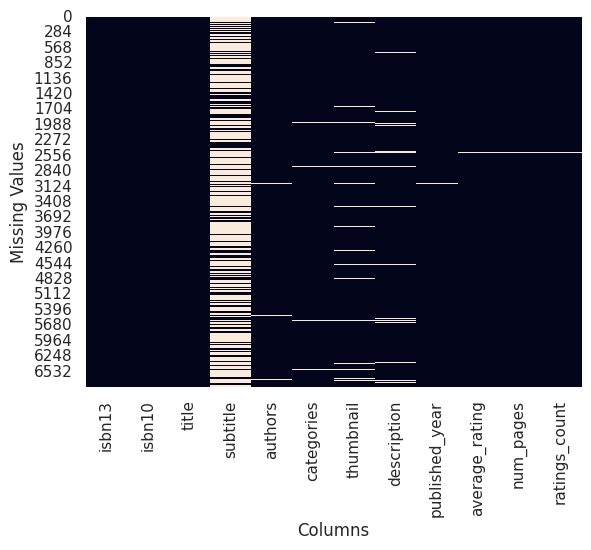

In [ ]:
ax = plt.axes()
sns.heatmap(books.isna(),cbar=False,ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

In [ ]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2025-books["published_year"]

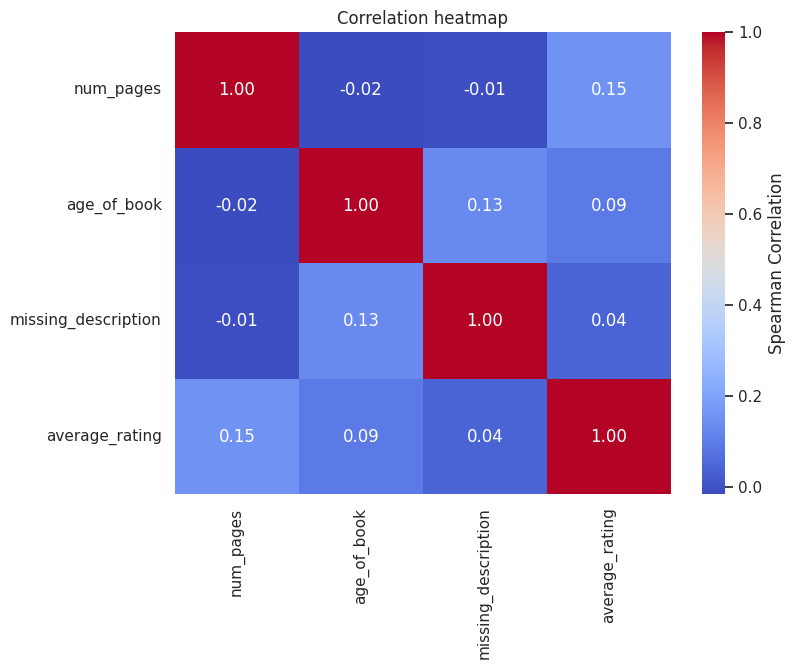

In [ ]:
columns_of_interest = ["num_pages","age_of_book","missing_description","average_rating"]
correlation_matrix = books[columns_of_interest].corr(method= "spearman")
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [ ]:
books_missing = books[(~books["description"].isna()) &
      (~books["average_rating"].isna()) &
      (~books["num_pages"].isna()) &
      (~books["published_year"].isna())
]

In [ ]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [ ]:
books_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [ ]:
import numpy as np

books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()
books_missing.loc[:, "age_of_book"] = 2025-books_missing["published_year"]

/tmp/ipython-input-65-4048365151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()


In [ ]:
books_missing_25_words = books_missing[books_missing["words_in_description"] > 25]

In [ ]:
books_missing.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
count,6.507000e+03,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000,6507.000000
mean,9.780668e+12,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502,66.325803
std,5.868404e+08,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214,66.120291
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000,1.000000
25%,9.780317e+12,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000,27.000000
50%,9.780552e+12,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000,40.000000
75%,9.780807e+12,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000,82.000000
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000,920.000000


In [ ]:
books_missing_25_words.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
count,5.088000e+03,5088.000000,5088.000000,5088.000000,5.088000e+03,5088.0,5088.000000,5088.000000
mean,9.780667e+12,1999.857901,3.921069,348.919811,2.131540e+04,0.0,25.142099,79.926494
std,5.977396e+08,9.045440,0.325486,230.207006,1.460321e+05,0.0,9.045440,68.804705
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000,26.000000
25%,9.780313e+12,1998.000000,3.750000,214.000000,1.810000e+02,0.0,20.000000,36.000000
50%,9.780521e+12,2002.000000,3.940000,313.000000,1.139000e+03,0.0,23.000000,48.000000
75%,9.780807e+12,2005.000000,4.120000,416.000000,6.635500e+03,0.0,27.000000,107.000000
max,9.789028e+12,2019.000000,5.000000,3342.000000,5.629932e+06,0.0,149.000000,920.000000


In [ ]:
books_missing_25_words.loc[:,"title_and_subtite"]=(
    np.where(books_missing_25_words["subtitle"].isna(),
             books_missing_25_words["title"],
             books_missing_25_words[["title","subtitle"]].astype(str).agg(": ".join,axis=1))
)

/tmp/ipython-input-69-4042539844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words.loc[:,"title_and_subtite"]=(


In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtite
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [ ]:
books_missing_25_words.loc[:,"tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)

/tmp/ipython-input-71-249821053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words.loc[:,"tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)


In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtite,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [ ]:
(
    books_missing_25_words
    .drop(["subtitle","missing_description","age_of_book","words_in_description"],axis=1)
    .to_csv("books_cleaned.csv",index=False)
)

In [ ]:
books=books_missing_25_words

In [ ]:
books["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2075
1,Juvenile Fiction,377
2,Biography & Autobiography,302
3,History,203
4,Literary Criticism,121
...,...,...
249,Amish,1
248,Imperialism,1
247,Lisbon (Portugal),1
246,Aeronautics,1


In [ ]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2075
1,Juvenile Fiction,377
2,Biography & Autobiography,302
3,History,203
4,Literary Criticism,121
5,Comics & Graphic Novels,116
6,Philosophy,112
7,Religion,112
8,Drama,81
9,Science,55


In [ ]:
category_mapping = {'Fiction' : "Fiction",
                    'Juvenile Fiction': "Children's Fiction",
                    'Biography & Autobiography': "Nonfiction" ,
                    'History' : "Nonfiction",
                    'Literary Criticism': "Nonfiction",
                    'Philosophy': "Nonfiction",
                    'Religion': "Nonfiction",
                    'Comics & Graphic Novels': "Fiction",
                    'Drama': "Fiction",
                    'Science': "Nonfiction",
                    'Juveline NonFiction' :"Children's Nonfiction",
                    'Poetry':"Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)


/tmp/ipython-input-77-3531838808.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["simple_categories"] = books["categories"].map(category_mapping)


In [ ]:
books['simple_categories']

,simple_categories
0,Fiction
1,NaN
3,Fiction
4,NaN
5,NaN
...,...
6802,NaN
6803,NaN
6804,NaN
6805,Nonfiction


In [ ]:
!pip install gliclass
!pip install -U transformers>=4.48.0


  Using cached transformers-4.48.2-py3-none-any.whl.metadata (44 kB)
Using cached transformers-4.48.2-py3-none-any.whl (9.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gliclass 0.1.11 requires transformers<=4.48.2,>=4.37.2, but you have transformers 4.52.4 which is incompatible.


#### Now NaN will be converted to categories using zero shot classification

In [ ]:
from gliclass import GLiClassModel, ZeroShotClassificationPipeline
from transformers import AutoTokenizer

model = GLiClassModel.from_pretrained("knowledgator/gliclass-modern-base-v2.0-init")
tokenizer = AutoTokenizer.from_pretrained("knowledgator/gliclass-modern-base-v2.0-init", add_prefix_space=True)
classifier = ZeroShotClassificationPipeline(model, tokenizer, classification_type='multi-label', device='cuda:0')

# from transformers import pipeline

fiction_classifier =["Fiction","NonFiction"]

# classifier = pipeline("zero-shot-classification",
#                       model="facebook/bart-large-mnli",
#                       device="cuda")


In [ ]:
sequence = books.loc[books["simple_categories"]=="Fiction","description"].reset_index(drop=True)[0]

In [ ]:
classifier(sequence,fiction_classifier)

100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


[[{'label': 'Fiction', 'score': 0.8300336599349976}]]

In [ ]:
import numpy as np
predictions = classifier(sequence,fiction_classifier)[0]
max_index = np.argmax([p['score'] for p in predictions])
max_label = predictions[max_index]["label"]
max_label

100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


'Fiction'

In [ ]:
import numpy as np

def generate_predictions(sequence,categories):
  predictions = classifier(sequence,categories)[0]
  if not predictions:  # Check if the list of predictions is empty
      return "Unknown"
  max_index = np.argmax([p['score'] for p in predictions])
  max_label = predictions[max_index]["label"]
  return max_label

In [ ]:
from tqdm import tqdm
actual_cats = []
predicted_cats = []

for i in tqdm(range(0,300)):
    try:
        sequence = books.loc[books["simple_categories"]=="Fiction","description"].reset_index(drop=True)[i]
        print(f"Processing sequence {i}: {sequence}")
        predicted_cat = generate_predictions(sequence,fiction_classifier)
        predicted_cats.append(predicted_cat) # Append the predicted_cat directly
        actual_cats.append("Fiction")
    except Exception as e:
        print(f"Error processing sequence {i}: {e}")
        predicted_cats.append("Error")
        actual_cats.append("Fiction")

  0%|          | 0/300 [00:00<?, ?it/s]

Processing sequence 0: A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and 


  0%|          | 1/300 [00:01<06:19,  1.27s/it]

Processing sequence 1: A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.



  1%|          | 2/300 [00:01<04:02,  1.23it/s]

Processing sequence 2: Tricked once more by his wily half-brother, Lysaer, Lord of Light, arrives at the tiny harbor town of Merior to find that Arithon's ship yards have been abandoned and meticulously destroyed, and that the Master of Shadow has disappeared as if into thin air. Meanwhile Arithon and the Mad Prophet Dakar are traveling on foot through the treacherous Kelhorn Mountains towards the Vastmark clans, there to raise further support for his cause. But raising a warhost is a costly business. Is it mere coincidence that Princess Talith—Lysaer's beautiful, headstrong wife—is taken captive and held for a vast ransom by a master brigand? The forces of light and shadow circle and feint, drawing ever closer to a huge conflict. And in the background the Fellowship of Seven Sorcerers and the Koriani Enchantresses watch and plan, and wait.



  1%|          | 3/300 [00:02<04:27,  1.11it/s]

Processing sequence 3: A Few Weeks After Marrying An Attractive Young Widow, Gordon Cloade Is Tragically Killed By A Bomb Blast In The London Blitz. Overnight, The Former Mrs Underhay Finds Herself In Sole Possession Of The Cloade Family Fortune. Shortly Afterwards, Hercule Poirot Receives A Visit From The Dead Man S Sister-In-Law Who Claims She Has Been Warned By Spirits That Mrs Underhay S First Husband Is Still Alive. Poirot Has His Suspicions When He Is Asked To Find A Missing Person Guided Only By The Spirit World. Yet What Mystifies Poirot Most Is The Woman S True Motive For Approaching Him&



  1%|▏         | 4/300 [00:03<04:20,  1.14it/s]

Processing sequence 4: For sixty years, Jewish refugees and their descendants have prospered in the Federal District of Sitka, a "temporary" safe haven created in the wake of revelations of the Holocaust and the shocking 1948 collapse of the fledgling state of Israel. Proud, grateful, and longing to be American, the Jews of the Sitka District have created their own little world in the Alaskan panhandle, a vibrant, gritty, soulful, and complex frontier city that moves to the music of Yiddish. For sixty years they have been left alone, neglected and half-forgotten in a backwater of history. Now the District is set to revert to Alaskan control, and their dream is coming to an end: once again the tides of history threaten to sweep them up and carry them off into the unknown. But homicide detective Meyer Landsman of the District Police has enough problems without worrying about the upcoming Reversion. His life is a shambles, his marriage a wreck, his career a disaster. He and his half-Tling


  2%|▏         | 5/300 [00:05<06:19,  1.29s/it]

Processing sequence 5: Designed to take fans of The Hobbit and The Lord of the Rings deeper into the myths and legends of Middle-earth The Silmarillion is an account of the Elder Days, of the First Age of Tolkien s world. It is the ancient drama to which the characters in The Lord of the Rings look back, and in whose events some of them such as Elrond and Galadriel took part. The tales of The Silmarillion are set in an age when Morgoth, the first Dark Lord, dwelt in Middle-Earth, and the High Elves made war upon him for the recovery of the Silmarils, the jewels containing the pure light of Valinor. Included in the book are several shorter works. The Ainulindale is a myth of the Creation and in the Valaquenta the nature and powers of each of the gods is described. The Akallabeth recounts the downfall of the great island kingdom of Numenor at the end of the Second Age and Of the Rings of Power tells of the great events at the end of the Third Age, as narrated in The Lord of the Rings. Th


  2%|▏         | 6/300 [00:06<06:20,  1.29s/it]

Processing sequence 6: Miller's groundbreaking first novel, banned in Britain for almost thirty years, now reinvigorated in a new Harper Perennial Modern Classics edition. A penniless and as yet unpublished writer, Henry Miller arrived in Paris in 1930. Leaving behind a disintegrating marriage and an unhappy career in America, he threw himself into the low-life of bohemian Paris with unwavering gusto. A fictional account of Miller's adventures amongst the prostitutes and pimps, the penniless painters and writers of Montparnasse, Tropic of Cancer is an extravagant and rhapsodic hymn to a world of unrivalled eroticism and freedom. Tropic of Cancer's 1934 publication in France was hailed by Samuel Beckett as 'a momentous event in the history of modern writing'. The novel was subsequently banned in the UK and the USA and not released for publication for a further thirty years.



  2%|▏         | 7/300 [00:08<06:23,  1.31s/it]

Processing sequence 7: A retelling of The Mabinogion in novel form. Manawydon finally unites with Rhiannon - an aspect of the Goddess - but his happiness is shaken by the appearance of the Gray Man, who seeks vengeance against the living and especially against one who would claim the Goddess.



  3%|▎         | 8/300 [00:08<05:09,  1.06s/it]

Processing sequence 8: Before she wrote her Pulitzer Prize-winning bestseller The Shipping News, E. Annie Proulx was already producing some of the finest short fiction in the country. Here are her collected stories, including two new works never before anthologized. These stories reverberate with rural tradition, the rites of nature, and the rituals of small-town life. The country is blue-collar New England; the characters are native families and the dispossessed working class, whose heritage is challenged by the neorural bourgeoisie from the city; and the themes are as elemental as the landscape: revenge, malice, greed, passion. Told with skill and profundity and crafted by a master storyteller, these are lean, tough tales of an extraordinary place and its people.



  3%|▎         | 9/300 [00:09<04:43,  1.03it/s]

Processing sequence 9: Arch-swindler Moist Van Lipwig never believed his confidence crimes were hanging offenses -- until he found himself with a noose tightly around his neck, dropping through a trapdoor, and falling into ... a government job? By all rights, Moist should have met his maker. Instead, it's Lord Vetinari, supreme ruler of Ankh-Morpork, who promptly offers him a job as Postmaster. Since his only other option is a nonliving one, Moist accepts the position -- and the hulking golem watchdog who comes along with it, just in case Moist was considering abandoning his responsibilities prematurely. Getting the moribund Postal Service up and running again, however, may be a near-impossible task, what with literally mountains of decades-old undelivered mail clogging every nook and cranny of the broken-down post office building; and with only a few creaky old postmen and one rather unstable, pin-obsessed youth available to deliver it. Worse still, Moist could swear the mail is talki


  3%|▎         | 10/300 [00:11<05:44,  1.19s/it]

Processing sequence 10: During an unfortunate helicopter ride into the wilds of Alaska, successful screenwriter Lou Calabrese is reunited with sexy Jack Townsend, but they are forced into a desperate battle for survival when they crash land in the wilderness.



  4%|▎         | 11/300 [00:11<04:23,  1.10it/s]

Processing sequence 11: What happens when a psychic tells Lucy that she'll be getting married within the year? Her roommates panic! What is going to happen to their blissful existence of eating take-out, drinking too much wine, bringing men home, and never vacuuming? Lucy reassures her friends that she's far too busy arguing with her mother and taking care of her irresponsible father to get married. And then there's the small matter of not even having a boyfriend. But then Lucy meets gorgeous, unreliable Gus. Could he be the future Mr. Lucy Sullivan? Or could it be handsome Chuck? Or Daniel, the world's biggest flirt? Or even cute Jed, the new guy at work? Maybe her friends have something to worry about after all....



  4%|▍         | 12/300 [00:12<04:02,  1.19it/s]

Processing sequence 12: Milan Kundera's Identity translated from the French by Linda Asher. There are situations in which we fail for a moment to recognize the person we are with, in which the identity of the other is erased while we simultaneously doubt our own. That also happens with couples -- indeed, above all with couples, because lovers fear more than anything else "losing sight" of the loved one. With stunning artfulness in expanding and playing variations on the meaningful moment, Milan Kundera has made this situation -- and the vague sense of panic it inspires -- the very fabric of his new novel. Here brevity goes hand in hand with intensity, and a moment of bewilderment marks the start of a labyrinthine journey during which the reader repeatedly crosses the border between the real and the unreal, between what occurs in the world outside and what the mind creates in its solitude. Of all contemporary writers, only Kundera can transform such a hidden and disconcerting perception


  4%|▍         | 13/300 [00:13<04:12,  1.14it/s]

Processing sequence 13: After a mysterious stranger promises to end his boredom with a trip to the magical Holiday House, ten-year-old Harvey learns that his fun has a high price



  5%|▍         | 14/300 [00:13<03:18,  1.44it/s]

Processing sequence 14: Working as a secretary at the British Embassy on Crete, Nicola Ferris is enjoying a day off when she meets up with two hiking companions who accidentally stumbled into the middle of a terrifying act of vengeance. Reprint.



  5%|▌         | 15/300 [00:13<02:43,  1.75it/s]

Processing sequence 15: An extraordinary artist with few rivals in his chosen arena, Dan Simmons possesses a restless talent that continually presses boundaries while tantalizing the mind and touching the soul. Now he offers us a superb quintet of novellas -- five dazzling masterworks of speculative fiction, including "Orphans of the Helix," his award-winning return to the Hyperion Universe -- that demonstrates the unique mastery, breathtaking invention, and flawless craftsmanship of one of contemporary fiction's true greats. Human colonists seeking something other than godhood encounter their long-lost "cousins"...and an ancient scourge. A devastated man in suicide's embrace is caught up in a bizarre cat-and-mouse game with a young woman possessing a world-ending power. The distant descendants of a once-oppressed people learn a chilling lesson about the persistence of the past. A terrifying ascent up the frigid, snow-swept slopes of K2 shatters preconceptions and reveals the true natu


  5%|▌         | 16/300 [00:14<03:28,  1.36it/s]

Processing sequence 16: After 15 years of designing more than 1,500 book jackets at Knopf for such authors as Anne Rice and Michael Chrichton, Kidd has crafted an affecting an entertaining novel set at a state university in the late 1950s that is both slap-happily funny and heartbreakingly sad. The Cheese Monkeys is a college novel that takes place over a tightly written two semesters. The book is set in the late 1950s at State U, where the young narrator, has decided to major in art, much to his parents’ dismay. It is an autobiographical, coming-of-age novel which tells universally appealing stories of maturity, finding a calling in life, and being inspired by a loving, demanding, and highly eccentric teacher.



  6%|▌         | 17/300 [00:15<03:28,  1.36it/s]

Processing sequence 17: A fictional portrait of Julius Caesar follows the legendary ancient Roman military and political leader from his remarkable conquest of Gaul, to his momentous decision at the Rubicon River, to his personal triumphs, tragedies, dreams, and disappointments. Reprint.



  6%|▌         | 18/300 [00:15<02:51,  1.65it/s]

Processing sequence 18: Drafted into the ranks of Earth's interstellar warriors, private William Mandella finds his fight against the Taurans secondary to the side-effects of faster-than-light space travel, which affects the rate at which he ages. Winner of the Hugo and Nebula Awards. Reprint. 25,000 first printing.



  6%|▋         | 19/300 [00:16<02:29,  1.88it/s]

Processing sequence 19: The Search For Her Sister Could Cost A Woman Her Life Christy McKenna, the smartest fashion writer in New York, thought she'd escaped her childhood in the impoverished rural West. Then came a call for help from the one person she could not refuse—her sister, the internationally celebrated model known only as Jo. Jo's plea draws Christy back to the magnificent mountains and mysterious red-rock canyons of the Four Corners country. But she's too late—Jo has disappeared. However, Christy does find an unlikely ally in outlaw archaeologist Aaron Cain, and together they pursue Jo and a fabulous cache of ancient Indian artifacts worth millions. Christy and Cain clash at every turn, but their antagonism soon turns into partnership—and blazing passion.



  7%|▋         | 20/300 [00:16<02:42,  1.73it/s]

Processing sequence 20: When an exquisitely crafted, authentic imperial Faberge egg mysteriously shows up at Laurel Swann's home studio, she knows it can only be from one person—her father, who has drifted in and out of her life for as long as she can remember. But this time Jamie Swann leaves her something too many people will kill for. Out of her league and desperate, Laurel is forced to accept help from the very man who is trying to ensnare her father in his own web of double crosses. Cruz Rowan can help her stay alive, but will he do the same for her father? Elizabeth Lowell, writing as Ann Maxwell, deftly combines the nonstop action of a spy thriller with the heart-pounding excitement of true love and adventure.



  7%|▋         | 21/300 [00:17<02:50,  1.63it/s]

Processing sequence 21: With this extraordinary first volume in what promises to be an epoch-making masterpiece, Neal Stephenson hacks into the secret histories of nations and the private obsessions of men, decrypting with dazzling virtuosity the forces that shaped this century. In 1942, Lawrence Pritchard Waterhouse - mathematical genius and young Captain in the U.S. Navy - is assigned to detachment 2702. It is an outfit so secret that only a handful of people know it exists, and some of those people have names like Churchill and Roosevelt. The mission of Watrehouse and Detatchment 2702-commanded by Marine Raider Bobby Shaftoe-is to keep the Nazis ignorant of the fact that Allied Intelligence has cracked the enemy's fabled Enigma code. It is a game, a cryptographic chess match between Waterhouse and his German counterpart, translated into action by the gung-ho Shaftoe and his forces. Fast-forward to the present, where Waterhouse's crypto-hacker grandson, Randy, is attempting to create


  7%|▋         | 22/300 [00:19<05:01,  1.08s/it]

Processing sequence 22: Fat Charlie Nancy's normal life ended the moment his father dropped dead on a Florida karaoke stage. Charlie didn't know his dad was a god. And he never knew he had a brother. Now brother Spider's on his doorstep—about to make Fat Charlie's life more interesting . . . and a lot more dangerous.



  8%|▊         | 23/300 [00:20<04:15,  1.08it/s]

Processing sequence 23: A mysterious circus terrifies an audience for one extraordinary performance before disappearing into the night, taking one of the spectators along with it . . . In a novella set two years after the events of American Gods, Shadow pays a visit to an ancient Scottish mansion, and finds himself trapped in a game of murder and monsters . . . In a Hugo Award-winning short story set in a strangely altered Victorian England, the great detective Sherlock Holmes must solve a most unsettling royal murder . . . Two teenage boys crash a party and meet the girls of their dreams—and nightmares . . . In a Locus Award-winning tale, the members of an excusive epicurean club lament that they've eaten everything that can be eaten, with the exception of a legendary, rare, and exceedingly dangerous Egyptian bird . . . Such marvelous creations and more—including a short story set in the world of The Matrix, and others set in the worlds of gothic fiction and children's fiction—can be 


  8%|▊         | 24/300 [00:21<05:05,  1.11s/it]

Processing sequence 24: Landing a catch like Talmadge Evans III got Eloise "Weezie" Foley a jewel of a town house in Savannah's historic district. Divorcing Tal got her exiled to the backyard carriage house, where she has launched a spite-fest with Tal's new fiancÉe, the elegant Caroline DeSantos. An antiques picker, Weezie combs Savannah's steamy back alleys and garage sales for treasures when she's not dealing with her loopy relatives or her hunky ex-boyfriend. But an unauthorized sneak preview at a sale lands Weezie smack in the middle of magnolia-scented murder, mayhem...and more. Dirty deals simmer all around her—just as her relationship with the cutest chef in town heats up and she finds out how delicious love can be the second time around.



  8%|▊         | 25/300 [00:22<04:36,  1.01s/it]

Processing sequence 25: Former cop-turned-dog trainer Jack Field is called in when the body of Allison DeMarco is found on her kitchen floor, accompanied by her high-strung Airedale, Ginger, and must enlist his special skills to find out what happened since Ginger appears to be the only witness to the crime. Original.



  9%|▊         | 26/300 [00:23<03:42,  1.23it/s]

Processing sequence 26: Why would there be a contract out on Edwin de Valu's life? Edwin -- the wiry low-level editor at Panderic Press. Why has rage disappeared from the roads and McDonald's gone alfalfa? How come everyone seems so damn happy? And most importantly, who, or what, is Tupak Soiree? When an enormous self-help manuscript lands on Edwin's desk, it's headed for the trash. Edwin's cynicism of self-help books, coupled with his filthy mood that morning, results in him dismissing Tupak Soiree's What I Learned on the Mountain and using it as a doorstop. However, Tupak's manuscript is unique -- a self-help book that actually works. Before Edwin knows it, a chain of events begins that affects not only his own life but the world at large. For those who choke on Chicken Soup for the Soul or have choice words for Dr. Phil, Will Ferguson offers up a killer dose of Happiness™ -- a masterpiece of comic fiction.



  9%|▉         | 27/300 [00:23<03:47,  1.20it/s]

Processing sequence 27: Former pop star Heather Wells has left behind hordes of screaming fans, to settle into a new adult life, but when strange things start happening at her college, she finds herself once again in the spotlight, this time starring as a spunky female detective. Original. 100,000 first printing.



  9%|▉         | 28/300 [00:24<03:05,  1.47it/s]

Processing sequence 28: Warrior of the Light: A Manual is an inspirational companion to The Alchemist, an international bestseller that has beguiled millions of readers around the world. Every short passage invites us to live out our dreams, to embrace the uncertainty of life, and to rise to our own unique destiny. In his inimitable style, Paulo Coelho helps bring out the Warrior of the Light within each of us. He also shows readers how to embark upon the way of the Warrior: the one who appreciates the miracle of being alive, the one who accepts failure, and the one whose quest leads him to become the person he wants to be. Paulo Coelho is one of the most beloved storytellers of our time. Now, in the long-awaited companion to his first novel, Coelho presents a collection of philosophical stories that will delight and guide seekers everywhere.



 10%|▉         | 29/300 [00:24<03:10,  1.42it/s]

Processing sequence 29: A community devoured by greed, cowardice, and fear. A man persecuted by the ghosts of his painful past. A young woman searching for happiness. In one eventful week, each will face questions of life, death, and power, and each will choose a path. Will they choose good or evil? In the remote village of Viscos -- a village too small to be on any map, a place where time seems to stand still -- a stranger arrives, carrying with him a backpack containing a notebook and eleven gold bars. He comes searching for the answer to a question that torments him: Are human beings, in essence, good or evil? In welcoming the mysterious foreigner, the whole village becomes an accomplice to his sophisticated plot, which will forever mark their lives. Paulo Coelho's stunning novel explores the timeless struggle between good and evil, and brings to our everyday dilemmas fresh perspective: incentive to master the fear that prevents us from following our dreams, from being different, fr


 10%|█         | 30/300 [00:25<03:30,  1.28it/s]

Processing sequence 30: One of the 20th century's enduring works, One Hundred Years of Solitude is a widely beloved and acclaimed novel known throughout the world, and the ultimate achievement in a Nobel Prize–winning career. The novel tells the story of the rise and fall of the mythical town of Macondo through the history of the Buendía family. It is a rich and brilliant chronicle of life and death, and the tragicomedy of humankind. In the noble, ridiculous, beautiful, and tawdry story of the Buendía family, one sees all of humanity, just as in the history, myths, growth, and decay of Macondo, one sees all of Latin America. Love and lust, war and revolution, riches and poverty, youth and senility -- the variety of life, the endlessness of death, the search for peace and truth -- these universal themes dominate the novel. Whether he is describing an affair of passion or the voracity of capitalism and the corruption of government, Gabriel García Márquez always writes with the simplicity


 10%|█         | 31/300 [00:27<03:59,  1.13it/s]

Processing sequence 31: Armed with the latest gifts of advanced technology, a California scientist, a ruthless corporation agent, and a mercenary hunter face the dangers of the Congo jungle in search of the diamonds of the lost city of Zinj. Reprint.



 11%|█         | 32/300 [00:27<03:10,  1.41it/s]

Processing sequence 32: Born of an incestuous relationship between King Arthur and his half sister, the evil sorceress Morgause, the bastard Mordred is reared in secrecy. Called to Camelot by events he cannot deny, Mordred becomes Arthur’s most trusted counselor -- a fateful act that leads to the "wicked day of destiny" when father and son must face each other in battle.



 11%|█         | 33/300 [00:27<02:45,  1.62it/s]

Processing sequence 33: Gold is the final and crowning achievement of the fifty-year career of science fiction's transcendent genius, the world-famous author who defined the field of science fiction for its practitioners, its millions of readers, and the world at large. The first section contains stories that range from the humorous to the profound, at the heart of which is the title story, "Gold," a moving and revealing drama about a writer who gambles everything on a chance at immortality: a gamble Asimov himself made -- and won. The second section contains the grand master's ruminations on the SF genre itself. And the final section is comprised of Asimov's thoughts on the craft and writing of science fiction.



 11%|█▏        | 34/300 [00:28<02:45,  1.60it/s]

Processing sequence 34: A young widow raising two boys, Sarah Laden is struggling to keep her family together. But when a shocking revelation rips apart the family of her closest friend, Sarah finds herself welcoming yet another troubled young boy into her already tumultuous life. Jordan, a quiet, reclusive elementary school classmate of Sarah's son Danny, has survived a terrible ordeal. By agreeing to become Jordan's foster mother, Sarah will be forced to question the things she has long believed. And as the delicate threads that bind their family begin to unravel, all the Ladens will have to face difficult truths about themselves and one another—and discover the power of love necessary to forgive and to heal.



 12%|█▏        | 35/300 [00:29<02:45,  1.60it/s]

Processing sequence 35: Just why do humpback whales sing? That's the question that has marine behavioral biologist Nate Quinn and his crew poking, charting, recording, and photographing very big, wet, gray marine mammals. Until the extraordinary day when a whale lifts its tail into the air to display a cryptic message spelled out in foot-high letters: Bite me. Trouble is, Nate's beginning to wonder if he hasn't spent just a little too much time in the sun. 'Cause no one else on his team saw a thing -- not his longtime partner, Clay Demodocus; not their saucy young research assistant; not even the spliff-puffing white-boy Rastaman Kona (né Preston Applebaum). But later, when a roll of film returns from the lab missing the crucial tail shot -- and his research facility is trashed -- Nate realizes something very fishy indeed is going on. By turns witty, irreverent, fascinating, puzzling, and surprising, Fluke is Christopher Moore at his outrageous best.



 12%|█▏        | 36/300 [00:29<03:03,  1.44it/s]

Processing sequence 36: Earth is long since dead. On a colony planet, a band of men has gained control of technology, made themselves immortal, and now rules their world as the gods of the Hindu pantheon. Only one dares oppose them: he who was once Siddhartha and is now Mahasamatman. Binder of Demons. Lord of Light.



 12%|█▏        | 37/300 [00:30<02:38,  1.66it/s]

Processing sequence 37: All the creatures of the night gather in "the Hollows" of Cincinnati, to hide, to prowl, to party ... and to feed. Vampires rule the darkness in a predator-eat-predator world rife with dangers beyond imagining -- and it’s Rachel Morgan's job to keep that world civilized. A bounty hunter and witch with serious sex appeal and an attitude, she'll bring 'em back alive, dead ... or undead.



 13%|█▎        | 38/300 [00:30<02:24,  1.81it/s]

Processing sequence 38: It's a tough life for witch Rachel Morgan, sexy, independent bounty hunter, prowling the darkest shadows of downtown Cincinnati for criminal creatures of the night. She can handle the leather-clad vamps and even tangle with a cunning demon or two. But a serial killer who feeds on the experts in the most dangerous kind of black magic is definitely pressing the limits. Confronting an ancient, implacable evil is more than just child's play -- and this time, Rachel will be lucky to escape with her very soul.



 13%|█▎        | 39/300 [00:31<02:20,  1.85it/s]

Processing sequence 39: in this place there are the dead, the deadly and the dying. there is the cross, the builders of the cross and the burners of the cross. the pattern of my life forms like a cheap shadow on the wall before me. my love what is left of it now must crawl to wherever it can crawl. the strongest know that death is final and the happiest are those gifted with the shortest journey.



 13%|█▎        | 40/300 [00:31<02:13,  1.95it/s]

Processing sequence 40: The beautiful, serene village of Molena Point, California is the type of place where people go to get away from the harsher realities of life––which is what attracted classic film star Patty Rose to buy the village inn, and settle down to enjoy her golden years. But as the town gathers to celebrate and honor the beautiful, aging actress with a festival of her old films, Patty is brutally murdered––to the horror and shock of this peaceful burg. A gentle tortoiseshell cat, Kit, has been enjoying a retreat to the animal–loving actress's inn, where she's spending time with her feline friends Dulcie, and the slick tomcat sleuth, Joe Grey. But her relaxation is cut short when she hears the gunshots that end Patty's life, and sees her dead body sprawled on the inn's front steps. She glimpses the killer racing into the parking garage, and soon follows his trail. Joe and Dulcie must now follow the naïve Kit's trail, and keep her from getting into serious trouble. To comp


 14%|█▎        | 41/300 [00:33<04:16,  1.01it/s]

Processing sequence 41: The fur starts flying when a gang from L.A. comes up to tranquil Molena Point, California, and begins breaking into the village's quaint shops. The fur of Joe Grey, Feline P.I., that is. After all, Molena Point has been his home since he was a kitten eating scraps from the garbage behind the local delicatessen, and he doesn't take well to marauding strangers. Joe even wonders whether the blonde who's moved into next to his human companion Clyde could be a part of the gang––she's been acting pretty suspicious lately. But when the strangers start trapping and caging feral cats––speaking cats like Joe and his girlfriend Dulcie––it proves too much for the intrepid four–footed detective. And when one of the gang is murdered, and a second mysterious death comes to light, he has no choice but to try to stop the crimes. Joe, Dulcie, and their tattercoat friend Kit, who used to be a stray herself, are deep into the investigation when they are able to release the three tr


 14%|█▍        | 42/300 [00:34<04:22,  1.02s/it]

Processing sequence 42: Alexandra (Barney) Barnaby roars onto the Miami Beach scene in hot pursuit of her missing baby brother, "Wild" Bill. Leave it to the maverick of the family to get Barney involved with high-speed car chases, a search for sunken treasure, and Sam Hooker, a NASCAR driver who’s good at revving a woman's engine. Engaged in a deadly race, Bill has "borrowed" Hooker's sixty-five-foot Hatteras and sailed off into the sunset...just when Hooker has plans for the boat. Hooker figures he'll attach himself to Barney and maybe run into scumbag Bill. And better yet, maybe he'll get lucky in love with Bill's sweetie pie sister. The pedal will have to go to metal if Barney and Hooker want to be the first to cross the finish line, save Bill, Hooker's boat...and maybe the world.



 14%|█▍        | 43/300 [00:35<04:07,  1.04it/s]

Processing sequence 43: Alexandra "Barney" Barnaby returns to take on a whole new set of bad guys, Florida heat, colorful and dangerous characters, and high-stakes adventure, all the while romancing gorgeous race car driver Sam Hooker, in an action-packed sequel to Metro Girl. 1,000,000 first printing.



 15%|█▍        | 44/300 [00:36<03:20,  1.28it/s]

Processing sequence 44: When they were children, Sean Devine, Jimmy Marcus, and Dave Boyle were friends. But then a strange car pulled up to their street. One boy got into the car, two did not, and something terrible happened -- something that ended their friendship and changed all three boys forever. Twenty-five years later, Sean is a homicide detective. Jimmy is an ex-con who owns a corner store. And Dave is trying to hold his marriage together and keep his demons at bay -- demons that urge him to do terrible things. When Jimmy's daughter is found murdered, Sean is assigned to the case. His investigation brings him into conflict with Jimmy, who finds his old criminal impulses tempt him to solve the crime with brutal justice. And then there is Dave, who came home the night Jimmy's daughter died covered in someone else's blood. A tense and unnerving psychological thriller, Mystic River is also an epic novel of love and loyalty, faith and family, in which people irrevocably marked by th


 15%|█▌        | 45/300 [00:36<03:30,  1.21it/s]

Processing sequence 45: Billy Budd, Sailor and Bartleby, the Scrivener are two of the most revered shorter works of fiction in history. Here, they are collected along with 19 other stories in a beautifully redesigned collection that represents the best short work of an American master.As Warner Berthoff writes in his introduction to this volume, "It is hard to think of a major novelist or storyteller who is not also a first-rate entertainer . . . a master, according to choice, of high comedy, of one or another robust species of expressive humour, or of some special variety of the preposterous, the grotesque, the absurd. And Melville, certainly, is no exception. A kind of vigorous supervisory humour is his natural idiom as a writer, and one particular attraction of his shorter work is the fresh further display it offers of this prime element in his literary character."



 15%|█▌        | 46/300 [00:37<03:25,  1.24it/s]

Processing sequence 46: Eleven Minutes is the story of Maria, a young girl from a Brazilian village, whose first innocent brushes with love leave her heartbroken. At a tender age, she becomes convinced that she will never find true love, instead believing that "love is a terrible thing that will make you suffer. . . ." A chance meeting in Rio takes her to Geneva, where she dreams of finding fame and fortune. Maria's despairing view of love is put to the test when she meets a handsome young painter. In this odyssey of self-discovery, Maria has to choose between pursuing a path of darkness -- sexual pleasure for its own sake -- or risking everything to find her own "inner light" and the possibility of sacred sex, sex in the context of love. This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recommended reading, and more.



 16%|█▌        | 47/300 [00:38<03:20,  1.26it/s]

Processing sequence 47: Charlie Asher is a pretty normal guy. A little hapless, somewhat neurotic, sort of a hypochondriac. He's what's known as a Beta Male: the kind of fellow who makes his way through life by being careful and constant -- you know, the one who's always there to pick up the pieces when the girl gets dumped by the bigger/taller/stronger Alpha Male. But Charlie's been lucky. He owns a building in the heart of San Francisco, and runs a secondhand store with the help of a couple of loyal, if marginally insane, employees. He's married to a bright and pretty woman who actually loves him for his normalcy. And she, Rachel, is about to have their first child. Yes, Charlie's doing okay for a Beta. That is, until the day his daughter, Sophie, is born. Just as Charlie -- exhausted from the birth -- turns to go home, he sees a strange man in mint-green golf wear at Rachel's hospital bedside, a man who claims that no one should be able to see him. But see him Charlie does, and from


 16%|█▌        | 48/300 [00:40<04:31,  1.08s/it]

Processing sequence 48: Quicksilver is the story of Daniel Waterhouse, fearless thinker and conflicted Puritan, pursuing knowledge in the company of the greatest minds of Baroque-era Europe, in a chaotic world where reason wars with the bloody ambitions of the mighty, and where catastrophe, natural or otherwise, can alter the political landscape overnight. It is a chronicle of the breathtaking exploits of "Half-Cocked Jack" Shaftoe -- London street urchin turned swashbuckling adventurer and legendary King of the Vagabonds -- risking life and limb for fortune and love while slowly maddening from the pox. And it is the tale of Eliza, rescued by Jack from a Turkish harem to become spy, confidante, and pawn of royals in order to reinvent Europe through the newborn power of finance. A gloriously rich, entertaining, and endlessly inventive novel that brings a remarkable age and its momentous events to vivid life, Quicksilver is an extraordinary achievement from one of the most original and i


 16%|█▋        | 49/300 [00:41<04:18,  1.03s/it]

Processing sequence 49: In her dazzling romantic suspense debut, USA Today bestselling author Suzanne Enoch brings us a thrilling tale about a thief who needs to prove she's no murderer and the millionaire who loves her. Samantha Jellicoe is a thief and proud of it. Raised to appreciate the finer things in life, Sam has no trouble divesting the wealthy of their treasures. This all changed, however, the night she attempts to steal a valuable item from a Palm Beach estate. Before she knew what hit her, a bomb goes off, a guard is killed, and Sam ends up saving millionaire Richard Addison. She's a good thief and will own up to her jobs, but if anyone thinks to tie her to murder, they better think again. On any other night, having a one hundred plus pounds of female fling herself at you is a good thing. But on this particular night, Richard Addison is mad as hell. Not only did he just have his gallery blown up-with him about to enter it-but the woman who rescued him didn't stick around to 


 17%|█▋        | 50/300 [00:42<04:19,  1.04s/it]

Processing sequence 50: Following a plane crash in the Himalayan mountains, a lost group of Englishmen and Americans stumble upon the dream-like, utopian world of Shangri-La, where life is eternal and civilization refined, in a new trade paperback edition of the classic 1933 novel. Reprint.



 17%|█▋        | 51/300 [00:42<03:26,  1.21it/s]

Processing sequence 51: When Megan Murphy discovered a floppy-eared rabbit gnawing on the hem of her skirt, she meant to give its careless owner a piece of her mind, but Dr. Patrick Hunter was too attractive to stay mad at for long. Soon the two are making Thanksgiving dinner for their families.



 17%|█▋        | 52/300 [00:42<02:48,  1.47it/s]

Processing sequence 52: Dear Reader: In a previous life, before the time of Plum, I wrote twelve short romance novels. Red-hot screwball comedies, each and every one of them. Nine of these stories were originally published by the Loveswept line between the years 1988 and 1992. All went out-of-print immediately and then could be found only at used bookstores and yard sales. I'm excited to tell you that those nine stories are now being re-released by HarperCollins. Love Overboard is second in the lineup, and it's presented here in almost original form. I've done only minor editing to correct some embarrassing bloopers missed the first time around. And I changed the title because I thought the original title (Ivan Takes a Wife) was boring! Love Overboard is a romantic tale about a handsome ship's captain; a wary wench from Jersey City; a hundred-year-old, two-masted schooner; and an entire town of shoemakers. There's some getting naked, some blueberry pie, more getting naked, and at the e


 18%|█▊        | 53/300 [00:44<03:29,  1.18it/s]

Processing sequence 53: Dear Reader: In a previous life, before the time of Plum, I wrote twelve short romance novels. Red-hot screwball comedies, each and every one of them. Nine of these stories were originally published by the Loveswept line between the years 1988 and 1992. All immediately went out of print and could be found only at used bookstores and yard sales. I'm excited to tell you that those nine stories are now being re-released by HarperCollins. Back to the Bedroom is presented here in almost original form. I've done only minor editing to correct some embarrassing bloopers missed the first time around. I lived in northern Virginia when I wrote Back to the Bedroom. My children were young, and we spent a lot of time visiting the Washington, D.C. museums and wandering through the historic neighborhoods. One day while strolling Capitol Hill I came upon two townhouses that captured my imagination. The houses were totally different -- a birthday cake of a house and a bran muffin


 18%|█▊        | 54/300 [00:46<05:18,  1.29s/it]

Processing sequence 54: Her tall, dark, and deliciously dangerous boss . . . When the delightful, daffy Dog Lady of station WZZZ offered to take on the temporary job of traffic reporter, Steve Crow tried to think of reasons to turn Daisy Adams down. Perhaps he knew that sharing the close quarters of a car with her for hours would give the handsome program director no room to resist her quirky charms. He'd always favored low-slung sportscars and high-heeled women, but that was before he fell for a free spirit who caught crooks by accident, loved old people and pets, and had just too many jobs! Loving Daisy turned Steve's life upside down, especially once he adopted Bob, a huge dog masquerading as a couch potato. But was Daisy finally ready to play for keeps?



 18%|█▊        | 55/300 [00:47<04:34,  1.12s/it]

Processing sequence 55: Marian Keyes has introduced readers to the lives, loves, and foibles of the five Walsh sisters -- Claire, Maggie, Rachel, Helen, and Anna -- and their crazy mammy. In this funny, heartbreaking, and triumphant new tale set in the Big Apple, it's Anna's turn in the spotlight. Life is perfect for Anna Walsh. She has the "Best Job in the World" as a PR exec for a top-selling urban beauty brand, a lovely apartment in New York, and a perfect husband -- the love of her life, Aidan Maddox. Until the morning she wakes up in her mammy's living room in Dublin with stitches in her face, a dislocated knee, and completely smashed-up hands -- and no memory of how she got there. While her mammy plays nursemaid (just like all of her favorite nurses on her soaps), and her sister Helen sits in wet hedges doing her private investigator work for Lucky Star PI, Anna tries to get better and keeps wondering why Aidan won't return her phone calls or e-mails. Recuperating from her injuri


 19%|█▊        | 56/300 [00:48<04:53,  1.20s/it]

Processing sequence 56: In the year 1689, a cabal of Barbary galley slaves -- including one Jack Shaftoe, aka King of the Vagabonds, aka Half-Cocked Jack -- devises a daring plan to win freedom and fortune. A great adventure ensues -- a perilous race for an enormous prize of silver ... nay, gold ... nay, legendary gold. In Europe, the exquisite and resourceful Eliza, Countess de la Zeur, is stripped of her immense personal fortune by France's most dashing privateer. Penniless and at risk from those who desire either her or her head (or both), she is caught up in a web of international intrigue, even as she desperately seeks the return of her most precious possession. Meanwhile, Newton and Leibniz continue to propound their grand theories as their infamous rivalry intensifies, stubborn alchemy does battle with the natural sciences, dastardly plots are set in motion ... and Daniel Waterhouse seeks passage to the Massachusetts colony in hopes of escaping the madness into which his world h


 19%|█▉        | 57/300 [00:49<04:40,  1.15s/it]

Processing sequence 57: In Christopher Moore's ingenious debut novel, we meet one of the most memorably mismatched pairs in the annals of literature. The good-looking one is one-hundred-year-old ex-seminarian and "roads" scholar Travis O'Hearn. The green one is Catch, a demon with a nasty habit of eating most of the people he meets. Behind the fake Tudor façade of Pine Cove, California, Catch sees a four-star buffet. Travis, on the other hand, thinks he sees a way of ridding himself of his toothy traveling companion. The winos, neo-pagans, and deadbeat Lotharios of Pine Cove, meanwhile, have other ideas. And none of them is quite prepared when all hell breaks loose.



 19%|█▉        | 58/300 [00:50<04:06,  1.02s/it]

Processing sequence 58: Take a wonderfully crazed excursion into the demented heart of a tropical paradise—a world of cargo cults, cannibals, mad scientists, ninjas, and talking fruit bats. Our bumbling hero is Tucker Case, a hopeless geek trapped in a cool guy's body, who makes a living as a pilot for the Mary Jean Cosmetics Corporation. But when he demolishes his boss's pink plane during a drunken airborne liaison, Tuck must run for his life from Mary Jean's goons. Now there's only one employment opportunity left for him: piloting shady secret missions for an unscrupulous medical missionary and a sexy blond high priestess on the remotest of Micronesian hells. Here is a brazen, ingenious, irreverent, and wickedly funny novel from a modern master of the outrageous.



 20%|█▉        | 59/300 [00:51<03:43,  1.08it/s]

Processing sequence 59: The town psychiatrist has decided to switch everybody in Pine Cove, California, from their normal antidepressants to placebos, so naturally—well, to be accurate, artificially—business is booming at the local blues bar. Trouble is, those lonely slide-guitar notes have also attracted a colossal sea beast named Steve with, shall we say, a thing for explosive oil tanker trucks. Suddenly, morose Pine Cove turns libidinous and is hit by a mysterious crime wave, and a beleaguered constable has to fight off his own gonzo appetites to find out what's wrong and what, if anything, to do about it.



 20%|██        | 60/300 [00:51<03:17,  1.21it/s]

Processing sequence 60: When Dorothy triumphed over the Wicked Witch of the West in L. Frank Baum's classic tale, we heard only her side of the story. But what about her arch-nemesis, the mysterious Witch? Where did she come from? How did she become so wicked? And what is the true nature of evil? Gregory Maguire creates a fantasy world so rich and vivid that we will never look at Oz the same way again. Wicked is about a land where animals talk and strive to be treated like first-class citizens, Munchkinlanders seek the comfort of middle-class stability, and the Tin Man becomes a victim of domestic violence. And then there is the little green-skinned girl named Elphaba, who will grow up to become the infamous Wicked Witch of the West, a smart, prickly, and misunderstood creature who challenges all our preconceived notions about the nature of good and evil.



 20%|██        | 61/300 [00:52<03:15,  1.22it/s]

Processing sequence 61: Ten years after the publication of Wicked, beloved novelist Gregory Maguire returns at last to the land of Oz. There he introduces us to Liir, an adolescent boy last seen hiding in the shadows of the castle after Dorothy did in the Witch. Bruised, comatose, and left for dead in a gully, Liir is shattered in spirit as well as in form. But he is tended to at the Cloister of Saint Glinda by the silent novice called Candle, who wills him back to life with her musical gifts. What dark force left Liir in this condition? Is he really Elphaba's son? He has her broom and her cape—but what of her powers? Can he find his supposed half-sister, Nor, last seen in the forbidding prison, Southstairs? Can he fulfill the last wishes of a dying princess? In an Oz that, since the Wizard's departure, is under new and dangerous management, can Liir keep his head down long enough to grow up? For the countless fans who have been dazzled and entranced by Maguire's Oz, Son of a Witch is 


 21%|██        | 62/300 [00:53<03:27,  1.15it/s]

Processing sequence 62: A fledgling actress vacationing in Corfu, Lucy Waring witnesses the murder of one of England's theater luminaries and becomes embroiled in a dangerous offstage drama. Reprint.



 21%|██        | 63/300 [00:53<02:42,  1.45it/s]

Processing sequence 63: Vanessa March never thought to look for her missing husband in Vienna -- until she saw him in a newsreel shot there at the scene of a deadly fire. But her hunt for answers only leads to more sinister questions in a mysterious world of beautiful horses. And what waits for Vanessa in the shadows is more terrifying than anything she has ever encountered.



 21%|██▏       | 64/300 [00:54<02:20,  1.68it/s]

Processing sequence 64: A family without men, the Birches live gloriously offbeat lives in the lush, green backwoods of North Carolina. Radiant, headstrong Sophia and her shy, brilliant daughter, Margaret, possess powerful charms to ward off loneliness, despair, and the human misery that often beats a path to their door. And they are protected by the eccentric wisdom and muscular love of the remarkable matriarch Charlie Kate, a solid, uncompromising, self-taught healer who treats everything from boils to broken bones to broken hearts. Sophia, Margaret, and Charlie Kate find strength in a time when women almost always depended on men, and their bond deepens as each one experiences love and loss during World War II. Charms for the Easy Life is a passionate, luminous, and exhilarating story about embracing what life has to offer ... even if it means finding it in unconventional ways. This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recom


 22%|██▏       | 65/300 [00:54<02:37,  1.50it/s]

Processing sequence 65: The Reading Group follows the trials and tribulations of a group of women who meet regularly to read and discuss books.Over the course of a year, each of these women become intertwined, both in the books they read and within each other's lives. Inspired by a shared desire for conversation, a good book and a glass of wine-Clare, Harriet, Nicole, Polly, and Susan undergo startling revelations and transformations despite their differences in background, age and respective dilemmas. What starts as a reading group gradually evolves into a forum where the women may express their views through the books they read and grow to become increasingly more open as the bonds of friendship cement. In The Reading Group, Noble reveals the many complicated paths in life we all face as well as the power and importance of friendship. This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recommended reading, and more.



 22%|██▏       | 66/300 [00:55<02:45,  1.42it/s]

Processing sequence 66: When Digory and Polly try to return the wicked witch Jadis to her own world, the magic gets mixed up and they all land in Narnia where they witness Aslan blessing the animals with human speech.



 22%|██▏       | 67/300 [00:55<02:14,  1.73it/s]

Processing sequence 67: That hot guy tied to Lissianna Argeneau's bed? He's not dessert—he's the main course! Lissianna has been spending her centuries pining for Mr. Right, not just a quick snack, and this sexy guy she finds in her bed looks like he might be a candidate. But there's another, more pressing issue: her tendency to faint at the sight of blood . . . an especially annoying quirk for a vampire. Of course it doesn't hurt that this man has a delicious-looking neck. What kind of cold-blooded vampire woman could resist a bite of that? Dr. Gregory Hewitt recovers from the shock of waking up in a stranger's bedroom pretty quickly—once he sees a gorgeous woman about to treat him to a wild night of passion. But is it possible for the good doctor to find true love with a vampire vixen, or will he be just a good meal? That's a question Dr. Greg might be willing to sink his teeth into . . . if he can just get Lissianna to bite.



 23%|██▎       | 68/300 [00:57<03:01,  1.28it/s]

Processing sequence 68: The astonishing novel Brave New World, originally published in 1932, presents Aldous Huxley's vision of the future -- of a world utterly transformed. Through the most efficient scientific and psychological engineering, people are genetically designed to be passive and therefore consistently useful to the ruling class. This powerful work of speculative fiction sheds a blazing critical light on the present and is considered to be Huxley's most enduring masterpiece. Following Brave New World is the nonfiction work Brave New World Revisited, first published in 1958. It is a fascinating work in which Huxley uses his tremendous knowledge of human relations to compare the modern-day world with the prophetic fantasy envisioned in Brave New World, including threats to humanity, such as overpopulation, propaganda, and chemical persuasion.



 23%|██▎       | 69/300 [00:58<03:22,  1.14it/s]

Processing sequence 69: Retired to the English countryside, an eighty-nine-year-old man, rumored to be a once-famous detective, is more concerned with his beekeeping than with his fellow man. Into his life wanders Linus Steinman, nine years old and mute, who has escaped from Nazi Germany with his sole companion: an African gray parrot. What is the meaning of the mysterious strings of German numbers the bird spews out -- a top-secret SS code? The keys to a series of Swiss bank accounts? Or do they hold a significance both more prosaic and far more sinister? Though the solution may be beyond even the reach of the once-famous sleuth, the true story of the boy and his parrot is subtly revealed in a wrenching resolution.



 23%|██▎       | 70/300 [00:59<03:21,  1.14it/s]

Processing sequence 70: From the winner of the National Book Foundations' 2000 Medal for Distinguished Contribution to American Letters comes a "sweet, funny . . . thought–provoking" (Milwaukee Journal Sentinel) collection of short stories. As in his most recent major fiction collections, One More for the Road (1999) and Driving Blind (1997), Ray Bradbury has once again pulled together a stellar group of stories sure to delight readers of all ages. In The Cat's Pyjamas we are treated to a treasure trove of Bradbury gems old and new –– eerie and strange, nostalgic and bittersweet, searching and speculative –– all but two of which have never been published before. The Cat's Pyjamas is a joyous celebration of the lifelong work of a literary legend.



 24%|██▎       | 71/300 [00:59<03:07,  1.22it/s]

Processing sequence 71: No one in 1917 New York had ever encountered a woman like the Bar-oness Elsa von Freytag-Loringhoven -- poet, artist, proto-punk rocker, sexual libertine, fashion avatar, and unrepentant troublemaker. When she wasn't stalking the streets of Greenwich Village wearing a brassiere made from tomato cans, she was enthusiastically declaiming her poems to sailors in beer halls or posing nude for Man Ray or Marcel Duchamp. In an era of brutal war, technological innovation, and cataclysmic change, the Baroness had resolved to create her own destiny -- taking the center of the Dadaist circle, breaking every bond of female propriety . . . and transforming herself into a living, breathing work of art.



 24%|██▍       | 72/300 [01:00<02:57,  1.28it/s]

Processing sequence 72: Summoned to a small harbor town by a former trenchmate falsely accused of assaulting an ex-lover's husband, Scotland Yard inspector Ian Rutledge is reminded of an affair from his own past and investigates a bizarre coincidence.



 24%|██▍       | 73/300 [01:00<02:23,  1.58it/s]

Processing sequence 73: Go further under the covers and stay in bed a little longer with Marian Keyes in this winning follow-up to her smash essay collection, Under the Duvet. Written in the witty, forthright style that has earned her legions of devoted readers, Cracks in My Foundation offers an even deeper and more candid look into this beloved author's mind and heart, exploring such universal themes as friends and family, home, glamour and beauty, children, travel, and more. Marian's hilarious and thoughtful take on life makes her readers feel they are reading a friend, not just an author. Marian continues to entertain with her reports from the trenches, and throws in some original short fiction as well. Whether it's visiting Siberia, breaking it off with an old hairdresser, shopping (of course!), turning forty, living with her beloved husband, Himself (a man beyond description), or musing on the F word (feminism), Marian shares the joys, passions, and sorrows of her world and helps 


 25%|██▍       | 74/300 [01:01<02:43,  1.38it/s]

Processing sequence 74: The evil night things that prowl Cincinnati despise witch and bounty hunter Rachel Morgan. Her new reputation for the dark arts is turning human and undead heads alike with the intent to possess, bed, and kill her -- not necessarily in that order. Now a mortal lover who abandoned Rachel has returned, haunted by his secret past. And there are those who covet what Nick possesses -- savage beasts willing to destroy the Hollows and everyone in it if necessary. Forced to keep a low profile or eternally suffer the wrath of a vengeful demon, Rachel must nevertheless act quickly. For the pack is gathering for the first time in millennia to ravage and to rule. And suddenly more than Rachel's soul is at stake.



 25%|██▌       | 75/300 [01:02<02:37,  1.43it/s]

Processing sequence 75: When a serial murderer begins killing off members of Hollows society, Rachel Morgan finds herself swept up in a brutal Inderland gang war, a situation that is complicated by her demonic nemesis, and the release of a vampire master.



 25%|██▌       | 76/300 [01:02<02:08,  1.75it/s]

Processing sequence 76: By the Pulitzer Prize-winning author of The Amazing Adventures of Kavalier & Clay This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recommended reading, and more.



 26%|██▌       | 77/300 [01:03<01:48,  2.06it/s]

Processing sequence 77: With only a yellowing photograph in hand, a young man -- also named Jonathan Safran Foer -- sets out to find the woman who may or may not have saved his grandfather from the Nazis. Accompanied by an old man haunted by memories of the war; an amorous dog named Sammy Davis, Junior, Junior; and the unforgettable Alex, a young Ukrainian translator who speaks in a sublimely butchered English, Jonathan is led on a quixotic journey over a devastated landscape and into an unexpected past. By turns comic and tragic, but always passionate, wildly inventive, and touched with an indelible humanity, this debut novel is a powerful, deeply felt story of searching: for the past, family, and truth.



 26%|██▌       | 78/300 [01:03<01:59,  1.86it/s]

Processing sequence 78: A new evil threatens Midkemia, its web stretching from the deepest criminal underworld all the way up to the highest seats of power in ancient Kesh. And the Conclave of Shadows, charged unexpectedly with the training of two apprentices, must also best powerful agents of the darkest magic . . . for the fate of two worlds lies in the balance. The New York Times bestselling author and master of fantasy Raymond E. Feist returns to his signature world of Midkemia in this first book in a gripping new trilogy that ushers in the third, and most dramatic, Riftwar yet: the Darkwar. In the middle of the night on Sorcerer's Isle, the powerful sorcerer Pug is awakened from a nightmare that portends destruction for all of Midkemia. Disturbed by the dream, Pug calls for a convening of the Conclave of Shadows. Though Pug does not yet know it, his son Magnus has discovered the cause of Pug's prophetic dream: a beacon has been unleashed, directing a vast army of alien invaders to


 26%|██▋       | 79/300 [01:05<03:25,  1.08it/s]

Processing sequence 79: Having successfully prevented a civil war within the Empire of Great Kesh, Pug and his allies in the Conclave of Shadows search for the mad sorcerer Leso Varen in the hopes of destroying the Guild of Assassins, an effort that is challenged by the sorcerer's powerful protectors and a planned invasion by the Dasati. By the author of Flight of the Nighthawks. 75,000 first printing.



 27%|██▋       | 80/300 [01:05<02:51,  1.28it/s]

Processing sequence 80: After pitched battle, The White—the avatars of the Five Gods—have briefly turned back the vicious invaders. And now, the priestess Auraya is sent on an urgent mission to reconcile with the powerful, outcast Dreamweavers, for their magical healing abilities may be the key to saving the land. But as a deadly plague devastates their allies and old adversaries resurface, a dreadful surprise may ruin the chance for peace. For Auraya's terrible discovery will force her into a desperate choice—one whose consequences will change the world forever.



 27%|██▋       | 81/300 [01:06<02:33,  1.42it/s]

Processing sequence 81: Unable to avoid being drawn into the terrible conflict, Auraya, now protector of the Siyee, fears she will be unable to meet the conditions of the all-powerful gods she once served. And an offer from a mysterious woman may be impossible for Auraya to refuse, but, if revealed, would brand her an enemy of the gods. Now, the immortal Wilds will not be deterred in their quest for powerful, long-buried secrets. But they have deadly adversaries who also seek the world-shattering truth . . . and it may appear in a form that no one anticipates.



 27%|██▋       | 82/300 [01:07<02:24,  1.51it/s]

Processing sequence 82: Nikki Eaton, single, thirty-one, sexually liberated, and economically self-supporting, has never particularly thought of herself as a daughter. Yet, following the unexpected loss of her mother, she undergoes a remarkable transformation during a tumultuous year that brings stunning horror, sorrow, illumination, wisdom, and even—from an unexpected source—a nurturing love.



 28%|██▊       | 83/300 [01:07<02:05,  1.73it/s]

Processing sequence 83: Bryony Ashley knows that her family's grand estate is both hell and paradise -- once elegant and beautiful, yet mired in debt and shrouded in shadow. Devastated by her father;s sudden strange death abroad, she is nonetheless relieved to learn the responsibility of running Ashley Court has fallen to a cousin. Still, her father's final, dire warning about a terrible family curse haunts her days and her dreams.



 28%|██▊       | 84/300 [01:07<01:54,  1.89it/s]

Processing sequence 84: A chronicle of the breathtaking exploits of "Half-Cocked Jack" Shaftoe -- London street urchin-turned-legendary swashbuckling adventurer -- risking life and limb for fortune and love while slowly maddening from the pox. . . and Eliza, rescued by Jack from a Turkish harem to become spy, confidante, and pawn of royals in order to reinvent a contentious continent through the newborn power of finance.



 28%|██▊       | 85/300 [01:08<01:49,  1.97it/s]

Processing sequence 85: The trials of Dr. Daniel Waterhouse and the Natural Philosophers increase one hundredfold in an England plagued by the impending war and royal insecurities -- as the beautiful and ambitious Eliza plays a most dangerous game as double agent and confidante of enemy kings.



 29%|██▊       | 86/300 [01:08<01:36,  2.21it/s]

Processing sequence 86: The Sheltering Sky is a landmark of twentieth-century literature. In this intensely fascinating story, Paul Bowles examines the ways in which Americans' incomprehension of alien cultures leads to the ultimate destruction of those cultures. A story about three American travelers adrift in the cities and deserts of North Africa after World War II, The Sheltering Sky explores the limits of humanity when it touches the unfathomable emptiness and impassive cruelty of the desert. This P.S. edition features an extra 16 pages of insights into the book, including author interviews, recommended reading, and more.



 29%|██▉       | 87/300 [01:09<01:55,  1.84it/s]

Processing sequence 87: A saga of three generations of the indomitable Cleary family begins in the early 1900s when Paddy Cleary, a poor New Zealand farm laborer, moves his wife and children to the Australian sheep station owned by his wealthy sister, in a new edition of the classic novel of forbidden love between young Meggie Cleary and Father Ralph de Bricassart. Reprint. 15,000 first printing.



 29%|██▉       | 88/300 [01:10<02:02,  1.72it/s]

Processing sequence 88: Introspective professional assassin John Keller, the anti-hero of Hit Man and Hit List, continues to ponder his life, the ethics of his lethal career, and his possible retirement as he returns in an all-new mystery adventure. 100,000 first printing.



 30%|██▉       | 89/300 [01:10<01:55,  1.83it/s]

Processing sequence 89: In late 1940s New York City, Cesar and Nestor Castillo, two young Cuban musicians, are dubbed the "Mambo Kings" for their talent and rise to superstardom. Reissue. (Tie in to the Broadway musical production, produced by Daryl Roth, opening August 2005) (Historical Fiction)



 30%|███       | 90/300 [01:11<01:54,  1.83it/s]

Processing sequence 90: Lizzie Nichols discovers that her inability to keep her mouth shut has landed her once again in hot water when she aggravates her unfaithful boyfriend, Andy, is stranded in London, and takes a job as a bartender for a catered wedding at a French chateau, an affair that ends with the groom in disgrace, a furious bride, and Andy returning to ruin everything. 100,000 first printing.



 30%|███       | 91/300 [01:11<01:50,  1.90it/s]

Processing sequence 91: According to The Nice and Accurate Prophecies of Agnes Nutter, Witch (the world's only completely accurate book of prophecies, written in 1655, before she exploded), the world will end on a Saturday. Next Saturday, in fact. Just before dinner. So the armies of Good and Evil are amassing, Atlantis is rising, frogs are falling, tempers are flaring. Everything appears to be going according to Divine Plan. Except a somewhat fussy angel and a fast-living demon—both of whom have lived amongst Earth's mortals since The Beginning and have grown rather fond of the lifestyle—are not actually looking forward to the coming Rapture. And someone seems to have misplaced the Antichrist . . .



 31%|███       | 92/300 [01:12<01:57,  1.77it/s]

Processing sequence 92: She thought her date was out of this world. Actually, he was not of this world . . . We've all been on bad dates, nightmare dates, dreadful experiences that turned out to be uniquely memorable in the very worst way. But at least our partners for these detestable evenings were more or less . . . human! Now Kim Harrison, Lynsay Sands, Kelley Armstrong, and Lori Handeland -- four of the very best writers currently exploring the dangerous seduction of the supernatural -- offer up dating disasters (and unexpected delights) of a completely different sort: dark, wicked, paranormally sensual assignations with werewolves, demon lovers, and the romantically challenged undead. Sexy, witty, chilling, and altogether remarkable, here is proof positive that some love matches are made someplace other than heaven.



 31%|███       | 93/300 [01:12<02:06,  1.63it/s]

Processing sequence 93: A powerful literary classic from one of contemporary fiction's most acclaimed and important writers, Russell Banks's Continental Drift is a masterful novel of hope lost and gained, and a gripping, indelible story of fragile lives uprooted and transformed by injustice, disappointment, and the seductions and realities of the American dream.



 31%|███▏      | 94/300 [01:13<01:50,  1.87it/s]

Processing sequence 94: Bookseller Bernie Rhodenbarr's in love—with an exotic Eastern European beauty who shares his obsession with Humphrey Bogart movies. He's in heaven, munching popcorn with his new amour every night at a Bogart Film Festival—until their Casablanca-esque idyll is cut short by his other secret passion: burglary. When he's hired to pilfer a portfolio of valuable documents from a Park Avenue apartment, Bernie can hardly refuse. But the occupant's early return forces Bernie to flee empty-handed—and he soon finds himself implicated in a murder. Before you can say "who stole the strawberries?" he's hunting for a killer, up to his neck in the outrageous intrigues of a tiny Balkan nation . . . and menaced by more sinister fat men and unsavory toadies than the great Bogie himself butted heads with in pursuit of that darn bird!



 32%|███▏      | 95/300 [01:14<02:04,  1.64it/s]

Processing sequence 95: Is a loved one missing some body parts? Are blondes becoming extinct? Is everyone at your dinner table of the same species? Humans and chimpanzees differ in only 400 genes; is that why a chimp fetus resembles a human being? And should that worry us? There's a new genetic cure for drug addiction—is it worse than the disease? We live in a time of momentous scientific leaps, a time when it's possible to sell our eggs and sperm online for thousands of dollars and to test our spouses for genetic maladies. We live in a time when one fifth of all our genes are owned by someone else, and an unsuspecting person and his family can be pursued cross-country because they happen to have certain valuable genes within their chromosomes . . . Devilishly clever, Next blends fact and fiction into a breathless tale of a new world where nothing is what it seems and a set of new possibilities can open at every turn. Next challenges our sense of reality and notions of morality. Balanc


 32%|███▏      | 96/300 [01:15<02:28,  1.37it/s]

Processing sequence 96: One of Gabriel García Márquez's most intricate and ambitious works, The Autumn of the Patriarch is a brilliant tale of a Caribbean tyrant and the corruption of power. From charity to deceit, benevolence to violence, fear of God to extreme cruelty, the dictator of The Autumn of the Patriarch embodies the best and the worst of human nature. Gabriel García Márquez, the renowned master of magical realism, vividly portrays the dying tyrant caught in the prison of his own dictator-ship. Employing an innovative, dreamlike style, and overflowing with symbolic descriptions, the novel transports the reader to a world that is at once fanciful and real.



 32%|███▏      | 97/300 [01:15<02:21,  1.43it/s]

Processing sequence 97: Claudia Corvette. From her tousled bedroom hair to her name–all the porn stars in this world take their names from supermodels and sports cars–she is adult entertainment's prototypical femme fatale. Her life is the collision of countless troubled–childhood cliches and grown–up wet dreams, projected onto her as surely as her videos project their blue light onto lonely men around the world. From its first panel, How to Make Money Like a Porn Star draws the reader into the dark world of girls like Claudia, the men who fantasize about them, and the monsters who control them. In the hands of Rolling Stone writer Neil Strauss and illustrator Bernard Chang, this adult graphic novel weaves together black humor and blacker reality. Like all great American stories, it features humble beginnings, life–changing tragedy, stripping, abuse, implants, fame, addiction, bigger implants, abduction, gunplay, downfall, and even bigger implants. Not to mention a thousand shades of la


 33%|███▎      | 98/300 [01:16<02:46,  1.22it/s]

Processing sequence 98: "My heart is afraid that it will have to suffer," the boy told the alchemist one night as they looked up at the moonless sky." Tell your heart that the fear of suffering is worse than the suffering itself. And that no heart has ever suffered when it goes in search of its dreams." Every few decades a book is published that changes the lives of its readers forever. The Alchemist is such a book. With over a million and a half copies sold around the world, The Alchemist has already established itself as a modern classic, universally admired. Paulo Coelho's charming fable, now available in English for the first time, will enchant and inspire an even wider audience of readers for generations to come. The Alchemist is the magical story of Santiago, an Andalusian shepherd boy who yearns to travel in search of a worldly treasure as extravagant as any ever found. From his home in Spain he journeys to the markets of Tangiers and across the Egyptian desert to a fateful enco


 33%|███▎      | 99/300 [01:17<03:02,  1.10it/s]

Processing sequence 99: An ambassador of the tenth-century Caliph of Bagdad is carried off by the Norsemen to endure, for three years, the harshness of their way of life and the creatures that terrorize them.



 33%|███▎      | 100/300 [01:18<02:24,  1.38it/s]

Processing sequence 100: Five days after a terrorist attack decimates his home city, Brian Remy struggles with gaps in his memory pertaining to a self-inflicted gunshot wound, a girlfriend whose name he does not know, and deteriorating eyesight, a situation that is further challenged when he is recruited to gather information for a shadowy intelligence operation. 100,000 first printing.



 34%|███▎      | 101/300 [01:18<02:03,  1.61it/s]

Processing sequence 101: The highly original satire about Oedipa Maas, a woman who finds herself enmeshed in a worldwide conspiracy, meets some extremely interesting characters, and attains a not inconsiderable amount of self knowledge.



 34%|███▍      | 102/300 [01:18<01:43,  1.92it/s]

Processing sequence 102: John Buddy Pearson, a young Black man who becomes a popular pastor at Zion Hope, is unable to reconcile his good intentions and his natural instincts



 34%|███▍      | 103/300 [01:19<01:26,  2.27it/s]

Processing sequence 103: A collection of short stories, most of which appeared in literary magazines during the author's lifetime, along with previously unpublished works, spans the career of one of the century's foremost African-American writers. Reprint.



 35%|███▍      | 104/300 [01:19<01:17,  2.53it/s]

Processing sequence 104: Selling more than 65,000 copies and topping bestseller lists around the world -- including Spain, Germany, Italy, and Latin America -- this novel tells the engrossing story of one man's quest for love and for his soul.



 35%|███▌      | 105/300 [01:19<01:11,  2.74it/s]

Processing sequence 105: In Sucess Stories, an exceptionally varied yet coherent collection, Russell Banks proves himself one of the most astute and forceful writers in America today. Queen for a Day, Success Story, and Adultery trace fortunes of the Painter family in there pursuit of and retreat from the American dream. Banks also explores the ethos of rampant materialism in a group of contemporary moral fables. The Fish is an evocating parable of faith and greed set in a Southeast Asian village, The Gully tells of the profitability of violence and the ironies of upward mobility in a Latin American shantytown, and Chrildren's Story explores the repressed rage that boils beneath the surface of relationships between parents and children and between citizens of the first and third worlds.



 35%|███▌      | 106/300 [01:20<01:29,  2.17it/s]

Processing sequence 106: Hijuelos' novel tells the story of Mr. Ives, who was adopted from a foundling's home as a child. When we first meet him in the 1950s, Mr. Ives is very much a product of his time. He has a successful career in advertising, a wife and two children, and believes he is on his way to pursuing the typical American dream. But the dream is shattered when his son Robert, who is studying for the priesthood, is killed violently at Christmas. Overwhelmed by grief and threatened by a loss of faith in humankind, Mr. Ives begins to question the very foundations of his life. Part love story--of a man for his wife, for his children, for God--and part meditation on how a person can find spiritual peace in the midst of crisis, Mr. Ives' Christmas is a beautifully written, tender and passionate story of a man trying to put his life in perspective. In the expert hands of Oscar Hijuelos, the novel speaks eloquently to the most basic and fulfilling aspects of life for all of us.



 36%|███▌      | 107/300 [01:21<01:55,  1.67it/s]

Processing sequence 107: Milan Kundera's lightest novel, a divertimento, an opera buffa, Slowness is also the first of this author's fictional works to have been written in French. Disconcerted and enchanted, the reader follows the narrator of Slowness through a midsummer's night in which two tales of seduction, separated by more than two hundred years, interweave and oscillate between the sublime and the comic. Underlying this libertine fantasy is a profound meditation on contemporary life: about the secret bond between slowness and memory, about the connection between our era's desire to forget and the way we have given ourselves over to the demon of speed. And about "dancers" possessed by the passion to be seen, for whom life is merely a perpetual show emptied of every intimacy and every joy.



 36%|███▌      | 108/300 [01:22<02:26,  1.31it/s]

Processing sequence 108: Elijah, a biblical prophet in the Middle East during the ninth century B.C., confronts the pagan princess Jezebel and finds love in the strange land of Zarephath with a young widow, only to have his new-found happiness shattered by tragedy



 36%|███▋      | 109/300 [01:22<02:09,  1.47it/s]

Processing sequence 109: The wild, macabre tale of the twentieth century and of two men -- one looking for something he has lost, the other with nothing much to lose -- and "V.," the unknown woman of the title.



 37%|███▋      | 110/300 [01:23<01:55,  1.64it/s]

Processing sequence 110: There are situations in which we fail for a moment to recognize the person we are with, in which the identity of the other is erased while we simultaneously doubt our own. This also happens with couples--indeed, above all with couples, because lovers fear more than anything else "losing sight" of the loved one. With stunning artfulness in expanding and playing variations on the meaningful moment, Milan Kundera has made this situation--and the vague sense of panic it inspires--the very fabric of his new novel. Here brevity goes hand in hand with intensity, and a moment of bewilderment marks the start of a labyrinthine journey during which the reader repeatedly crosses the border between the real and the unreal, between what occurs in the world outside and what the mind creates in its solitude. Of all contemporary writers, only Kundera can transform such a hidden and disconcerting perception into the material for a novel, one of his finest, most painful, and most


 37%|███▋      | 111/300 [01:24<02:17,  1.37it/s]

Processing sequence 111: Nathan Price, a evangelical Baptist who in 1959 has taken his wife and four daughters on a mission to the Belgian Congo, finds that their traditions are no longer secure in this very different world. Reprint. 250,000 first printing.



 37%|███▋      | 112/300 [01:24<01:52,  1.68it/s]

Processing sequence 112: A triumph of the imagination and a masterpiece of modern storytelling, Cloudsplitter is narrated by the enigmatic Owen Brown, last surviving son of America's most famous and still controversial political terrorist and martyr, John Brown. Deeply researched, brilliantly plotted, and peopled with a cast of unforgettable characters both historical and wholly invented, Cloudsplitter is dazzling in its re-creation of the political and social landscape of our history during the years before the Civil War, when slavery was tearing the country apart. But within this broader scope, Russell Banks has given us a riveting, suspenseful, heartbreaking narrative filled with intimate scenes of domestic life, of violence and action in battle, of romance and familial life and death that make the reader feel in astonishing ways what it is like to be alive in that time.



 38%|███▊      | 113/300 [01:25<01:59,  1.57it/s]

Processing sequence 113: Renowned as a master of magical realism, Gabriel Garcia Marquez has long delighted readers around the world with his exquisitely crafted prose. Brimming with unforgettable characters and set in exotic locales, his fiction transports readers to a world that is at once fanciful, haunting, and real. Leaf Storm, Gabriel Garcia Marquez's first novella, introduces the mythical village of Macondo, a desolate town beset by torrents of rain, where a man must fulfill a promise made years earlier. No One Writes to the Colonel is a novella of life in a decaying tropical town in Colombia with an unforgettable central character. Chronicle of a Death Foretold is a dark and profound story of three people joined together in a fatal act of violence.



 38%|███▊      | 114/300 [01:26<01:59,  1.55it/s]

Processing sequence 114: Collected here are twenty-six of Gabriel Garcia Marquez's most brilliant and enchanting short stories, presented in the chronological order of their publication in Spanish from three volumes: Eyes of a Blue Dog,Big Mama's Funeral, and The Incredible and Sad Tale of lnnocent Eréndira and Her Heartless Grandmother. Combining mysticism, history, and humor, the stories in this collection span more than two decades, illuminating the development of Marquez's prose and exhibiting the themes of family, poverty, and death that resound throughout his fiction.



 38%|███▊      | 115/300 [01:26<01:53,  1.63it/s]

Processing sequence 115: Bobby Jobe is a pro golfer whose swing is better than his attitude. When he bogies the last four holes and blows his lead in a major tournament -- again -- he berates his caddy, Henry "Greyhound" Mote. Jobe loses both Greyhound, who walks off the course, and the game. And before the day is out, he'll lose his eyesight to a lightning strike and his future in golf -- unless he can do what no one has ever done blind: make a comeback. Bob Cullen's funny and wise story, full of PGA lore, perfectly captures the mysterious and irresistible nature of the game of golf, not to mention, love, friendship, and life.



 39%|███▊      | 116/300 [01:27<01:55,  1.60it/s]

Processing sequence 116: The Great Depression has bound a nation in despair -- and only a privileged few have risen above it: the exorbitantly wealthy ... and the hucksters who feed upon them. Diego, a seventeen-year-old illegal Mexican immigrant, owes his salvation to master grifter Thomas Schell. Together with Schell's gruff and powerful partner, they sail comfortably through hard times, scamming New York's grieving rich with elaborate, ingeniously staged séances -- until an impossible occurrence changes everything. While "communing with spirits," Schell sees an image of a young girl in a pane of glass, silently entreating the con man for help. Though well aware that his otherworldly "powers" are a sham, Schell inexplicably offers his services to help find the lost child -- drawing Diego along with him into a tangled maze of deadly secrets and terrible experimentation. At once a hypnotically compelling mystery and a stunningly evocative portrait of Depression-era New York, The Girl i


 39%|███▉      | 117/300 [01:28<02:10,  1.40it/s]

Processing sequence 117: Suddenly confronted with his own mortality after a routine checkup, eminent psychotherapist Julius Hertzfeld is forced to reexamine his life and work -- and seeks out Philip Slate, a sex addict whom he failed to help some twenty years earlier. Yet Philip claims to be cured -- miraculously transformed by the pessimistic teachings of German philosopher Arthur Schopenhauer -- and is, himself, a philosophical counselor in training. Philips dour, misanthropic stance compels Julius to invite Philip to join his intensive therapy group in exchange for tutoring on Schopenhauer. But with mere months left, life may be far too short to help Philip or to compete with him for the hearts and minds of the group members. And then again, it might be just long enough.



 39%|███▉      | 118/300 [01:28<02:08,  1.42it/s]

Processing sequence 118: The story of a young couple from Brooklyn who marry young, have little money, and face bitter parental opposition, but are determined to make something of their life together.



 40%|███▉      | 119/300 [01:29<01:43,  1.74it/s]

Processing sequence 119: Set in Liberia and the United States from 1975 through 1991, The Darling is the story of Hannah Musgrave, a political radical and member of the Weather Underground. Hannah flees America for West Africa, where she and her Liberian husband become friends of the notorious warlord and ex-president, Charles Taylor. Hannah's encounter with Taylor ultimately triggers a series of events whose momentum catches Hannah's family in its grip and forces her to make a heartrending choice.



 40%|████      | 120/300 [01:29<01:37,  1.84it/s]

Processing sequence 120: Barbara Kingsolver's fifth novel is a hymn to wildness that celebrates the prodigal spirit of human nature, and of nature itself. It weaves together three stories of human love within a larger tapestry of lives amid the mountains and farms of southern Appalachia. Over the course of one humid summer, this novel's intriguing protagonists face disparate predicaments but find connections to one another and to the flora and fauna with which they necessarily share a place.



 40%|████      | 121/300 [01:30<01:32,  1.94it/s]

Processing sequence 121: Private investigator Race Williams is approached by a larger detective agency to help hunt down a criminal gang leader, but he turns down the deal because he prefers to work solo. Somehow word leaks out that he's on the case, and an assassin is put on his tail.



 41%|████      | 122/300 [01:30<01:20,  2.22it/s]

Processing sequence 122: A national bestseller, voted by Time as the #1 novel of 1991, selected as one of the "Best Books of 1991" by Publishers Weekly, and nominated for a National Book Critics Circle Award--a magnificent story that probes the meaning of love, science, music, and art, by the brilliant author of Three Farmers on Their Way to a Dance.



 41%|████      | 123/300 [01:30<01:16,  2.31it/s]

Processing sequence 123: In the spring of 1914, renowned photographer August Sander took a photograph of three young men on their way to a country dance. This haunting image, capturing the last moments of innocence on the brink of World War I, provides the central focus of Powers's brilliant and compelling novel. As the fate of the three farmers is chronicled, two contemporary stories unfold. The young narrator becomes obsessed with the photo, while Peter Mays, a computer writer in Boston, discovers he has a personal link with it. The three stories connect in a surprising way and provide the reader with a mystery that spans a century of brutality and progress.



 41%|████▏     | 124/300 [01:31<01:22,  2.12it/s]

Processing sequence 124: A portrait of America as seen through the eyes of its new arrivals follows the story of an intensely feminine Cuban-Irish family of fourteen daughters and its one doggedly masculine son



 42%|████▏     | 125/300 [01:31<01:12,  2.41it/s]

Processing sequence 125: Hailed by the New York Times as "wildly ambitious" and "the sort of book that a young Herman Melville might have written had he lived today and studied such disparate works as the Bible, 'The Wasteland,' Fahrenheit 451, and Dog Soldiers, screened Star Wars and Apocalypse Now several times, dropped a lot of acid and listened to hours of Jimi Hendrix and the Rolling Stones," Fiskadoro is a stunning novel of an all-too-possible tomorrow. Deeply moving and provacative, Fiskadoro brilliantly presents the sweeping and heartbreaking tale of the survivors of a devastating nuclear war and their attempts to breaking tale of the survivors of a devastating nuclear war and their attempts to salvage remnants of the old world and rebuild their culture.



 42%|████▏     | 126/300 [01:32<01:26,  2.02it/s]

Processing sequence 126: Set in Nicaragua in 1984, The Stars at Noon is a story of passion, fear, and betrayal told in the voice of an American woman whose mission in Central America is as shadowy as her surroundings. Is she a reporter for an American magazine as she sometimes claims, or a contact person for Eyes of Peace? And who is the rough English businessman with whom she becomes involved? As the two foreigners become entangled in increasingly sinister plots, Denis Johnson masterfully dramatizes a powerful vision of spiritual bereavement and corruption.



 42%|████▏     | 127/300 [01:32<01:26,  2.01it/s]

Processing sequence 127: Highly imaginative and emotionally powerful, this stunning novel about childhood innocence amid the nightmarish disease and deterioration at the heart of modern Los Angeles was nominated for a National Book Award.



 43%|████▎     | 128/300 [01:33<01:13,  2.33it/s]

Processing sequence 128: Hempel's now-classic collection of short fiction is peopled by complex characters who have discovered that their safety nets are not dependable and who must now learn to balance on the threads of wit, irony, and spirit.



 43%|████▎     | 129/300 [01:33<01:06,  2.57it/s]

Processing sequence 129: Something is wrong with Eddie Hobson Sr., father of four, sometime history teacher, quiz master, black humorist and virtuoso invalid. His recurring fainting spells have worsened, and with his ingrained aversion to doctors, his worried family tries to discover the nature of his sickness. Meanwhile, in private, Eddie puts the finishing touches on a secret project he calls Hobbstown, a place that he promises will save him, the world and everything that's in it. A dazzling novel of compassion and imagination, Prisoner's Dilemma is a story of the power of invalid experience.



 43%|████▎     | 130/300 [01:34<01:21,  2.09it/s]

Processing sequence 130: A debut novel of dark foreboding and family tragedy that won the prestigious Booker Prize traces the decline of one family in Southern India in the late sixties, which begins with an episode of forbidden love. Reprint. Tour.



 44%|████▎     | 131/300 [01:34<01:20,  2.11it/s]

Processing sequence 131: When Karen Ann MacNeil awakens after being in a coma for eighteen years, the world suddenly encounters disturbing, terrifying, and radical changes that alter reality, and Karen and her friends must try to stop the madness and restore order to the world. Reprint. 40,000 first printing.



 44%|████▍     | 132/300 [01:35<01:21,  2.06it/s]

Processing sequence 132: Is this new land a place where magics really happen? From Gregory Maguire, the acclaimed author of Wicked, comes his much-anticipated second novel, a brilliant and provocative retelling of the timeless Cinderella tale. In the lives of children, pumpkins can turn into coaches, mice and rats into human beings.... When we grow up, we learn that it's far more common for human beings to turn into rats.... We all have heard the story of Cinderella, the beautiful child cast out to slave among the ashes. But what of her stepsisters, the homely pair exiled into ignominy by the fame of their lovely sibling? What fate befell those untouched by beauty . . . and what curses accompanied Cinderella's exquisite looks? Extreme beauty is an affliction Set against the rich backdrop of seventeenth-century Holland, Confessions of an Ugly Stepsister tells the story of Iris, an unlikely heroine who finds herself swept from the lowly streets of Haarlem to a strange world of wealth, ar


 44%|████▍     | 133/300 [01:37<02:42,  1.03it/s]

Processing sequence 133: The author initially intended to call this novel The Lyrical Age. The lyrical age, according to Kundera, is youth, and this novel, above all, is an epic of adolescence; an ironic epic that tenderly erodes sacrosanct values: childhood, motherhood, revolution, and even poetry. Jaromil is in fact a poet. His mother made him a poet and accompanies him (figuratively) to his love bed and (literally) to his deathbed. A ridiculous and touching character, horrifying and totally innocent ("innocence with its bloody smile"!), Jaromil is at the same time a true poet. He's no creep, he's Rimbaud. Rimbaud entrapped by the communist revolution, entrapped in a somber farce.



 45%|████▍     | 134/300 [01:37<02:27,  1.12it/s]

Processing sequence 134: Fans of Lillian Jackson Braun and Rita Mae Brown and cat lovers everywhere will delight in this newest mystery featuring two furry felines on the scent of a killer. Famous novelist Elliot Traynor is temporarily living in Molena Point. He and his wife don't have much to do with the villagers, which is fine with them since no one particularly likes Vivi. But their arrival has coincided with some peculiar happenings in the town, culminating with a botched burglary in the home of 60–something Susan Brittian. Susan is a friend to feline detectives Joe Grey and Dulcie and they aren't going to let this crime go unpunished. With whiskers twitching they investigate the crime and soon find themselves on the scent of a killer.



 45%|████▌     | 135/300 [01:38<02:16,  1.21it/s]

Processing sequence 135: As S&M photographer Jared Poe waits on Louisiana's Death Row to be executed for the murder of his lover, he can not imagine that his search for the true killer will continue after his death in the shadowy realm of The Crow



 45%|████▌     | 136/300 [01:38<01:48,  1.51it/s]

Processing sequence 136: Second in line for succession to the throne, Prince Dagnarus will have his crown...and his queen -- though his heart's prize is a married elfin beauty. Let his hated half-brother Prince Helmos and the Dominion Lords dare to oppose him. For Dagnarus's most loyal servant has ventured into the terrible darkness, where lies the most potent talisman in the realm. And once it is in the dark prince's hand, no power will deter his Destiny.



 46%|████▌     | 137/300 [01:39<01:39,  1.64it/s]

Processing sequence 137: Terry Pratchett's profoundly irreverent novels are consistent number one bestsellers in England, where they have garnered him a revered position in the halls of parody next to Mark Twain, Kurt Vonnegut, Douglas Adams, and Carl Hiaasen. In The Light Fantastic only one individual can save the world from a disastrous collision. Unfortunately, the hero happens to be the singularly inept wizard Rincewind, who was last seen falling off the edge of the world...



 46%|████▌     | 138/300 [01:39<01:32,  1.74it/s]

Processing sequence 138: Armed with stolen U.S. military technology, the Chinese are producing a frightening new breed of weaponry,led by the ICBM submarine Xia III -- a vessel that just might be able to launch a nuclear warhead across the Pacific Ocean and take out an American West Coast city. National Security Adviser Admiral Arnold Morgan can't let that happen, and he dispatches the most stealthy hunter-killer submarine in the U.S. fleet, the 9,000-ton ultrasecret Seawolf, deep into the dark, forbidden waters of the South China Sea. But then the unthinkable happens: Seawolf, collides with a Chinese destroyer and falls into enemy hands. A team of cunning Navy SEALs -- the biggest Special Forces assault group assembled since Vietnam -- is sent in to free the captive Seawolf, crew and bring them home. The American Eagle confronts the Chinese Dragon with the balance of world power on the line. Failure is not an option...



 46%|████▋     | 139/300 [01:40<01:45,  1.53it/s]

Processing sequence 139: In the tradition of "The Wheel of Time, " this lavishly illustrated work is a definitive reference guide to the fantasy worlds of bestselling authors Weis and Hickman. Illustrations, many in full color.



 47%|████▋     | 140/300 [01:40<01:27,  1.83it/s]

Processing sequence 140: When Jessica marries David, he is everything she wants in a family man: brilliant, attentive, ever youthful. Yet she still feels something about him is just out of reach. Soon, as people close to Jessica begin to meet violent, mysterious deaths, David makes an unimaginable confession: More than 400 years ago, he and other members of an Ethiopian sect traded their humanity so they would never die, a secret he must protect at any cost. Now, his immortal brethren have decided David must return and leave his family in Miami. Instead, David vows to invoke a forbidden ritual to keep Jessica and his daughter with him forever. Harrowing, engrossing and skillfully rendered, My Soul to Keep traps Jessica between the desperation of immortals who want to rob her of her life and a husband who wants to rob her of her soul. With deft plotting and an unforgettable climax, this tour de force reminiscent of early Anne Rice will win Due a new legion of fans.



 47%|████▋     | 141/300 [01:41<01:40,  1.58it/s]

Processing sequence 141: On the world of Athera, the fate of all realms hangs on the resolution of the brutal conflict born of prince against prince. Branded a minion of evil -- escaping the death sentence imposed by his half-brother Lysaer and his Alliance of Light -- Arithon, Master of Shadow, now faces the last choice remaining to him in the merciless winter wilds: to cast his lot with a renegade enchanter whom Arithon dares not trust ... or die by the swords of fanatical enemies.



 47%|████▋     | 142/300 [01:42<01:34,  1.67it/s]

Processing sequence 142: Half brothers Lysaer, the Prince of the Light, and Arithon, the Master of Shadow, engage in violent conflict in the wake of the Vastmark Warhost's destruction and the strategies of the Koriani Enchantresses



 48%|████▊     | 143/300 [01:42<01:19,  1.97it/s]

Processing sequence 143: A sexy new repackaging of the extremely popular anthology of vampire erotica, edited by acclaimed author Poppy Z. Brite. The classic horror tale is about fear. But in the last few years a new literature of the macabre has arisen, one that goes deeper than horror, beyond fear, to explore our darkest, most intimate hungers. The ones even lovers are forbidden to share. Acclaimed dark fantasy author Poppy Z. Brite has brought together this genre's most powerful and seductive authors in an original collection of vampiric erotica, a shameless celebration of unspeakable intimacies. It is not for everyone. But neither is the night.



 48%|████▊     | 144/300 [01:43<01:25,  1.83it/s]

Processing sequence 144: It's been quite a week for Joe Grey. First the large, powerful feline discovers that, through some strange, inexplicable phenomenon, he now has the ability to understand human language. Then he discovers he can speak it as well! It's a nightmare for a cat who'd prefer to sleep the day away carefree, but Joe can handle it. That is, until he has the misfortune to witness a murder in the alley behind Jolly's Deli -- and worse, to be seen witnessing it. With all of his nine lives suddenly at risk, Joe's got no choice but to get to the bottom of the heinous crime -- because his mouse-hunting days are over for good unless he can help bring a killer to justice.



 48%|████▊     | 145/300 [01:43<01:29,  1.73it/s]

Processing sequence 145: "Of course I worry. What if the cops witness a cat opening a skylight and masterminding a robbery? The tabloids will love it." There's a new pair of thieves in Molena Point, California, a renegade yellow-eyed tomcat with a cold disdain for the law, and a scruffy human partner who is no better. The two, clever and silent at their work, are bad news indeed to crime-solving cats Joe Grey and Dulcie. But when Joe learns the pair's connection to a good friend, and then an innocent couple turns up dead in the library garden, Joe and Dulcie must engage in some fancy paw work to unmask the deceptions and route the real killer -- before his brazen criminal crime spree careens madly toward them.



 49%|████▊     | 146/300 [01:44<01:34,  1.62it/s]

Processing sequence 146: A shattering childhood tragedy left Quentin Fears devastated and unable to cope with the world and its citizens. It didn't, however, prevent him from making millions through brilliant investments. And now the enigmatic recluse has experienced the extraordinarily unexpected: love at first sight. But a whirlwind courtship and marriage to Madeleine -- beautiful, witty, and equally ill-at-ease with reality -- is bringing Quentin something other than the bliss he anticipated, for now he must meet his new wife's family. A bizarre, dysfunctional collection of extreme characters, they are guarding a secret both shocking and terrifying -- as is Madeleine herself. And suddenly Quentin Fears must prevent his dream woman from unleashing an ageless malevolence intent on ruling the world.



 49%|████▉     | 147/300 [01:45<01:37,  1.56it/s]

Processing sequence 147: Damaged Houses A master craftsman, Don Lark could fix everything except what mattered, his own soul. After tragedy claimed the one thing he loved, he began looking for dilapidated houses to buy, renovate, and resell at a profit--giving these empty shells the second chance at life he denied himself. Damaged Souls Then in a quiet Southern town, Lark finds his biggest challenge: a squalid yet sturdy mansion that has suffered decades of abuse at the hands of greedy landlords and transient tenants. While two charming old neighbor ladies ply him with delicious cooking, they offer dire warnings about the house's evil past. But there is something about this building that pushes Lark on, even as its enchantments grow increasingly ominous. Will finishing the house offer Lark redemption, or unleash the darkest forces of damnation upon him?



 49%|████▉     | 148/300 [01:45<01:41,  1.49it/s]

Processing sequence 148: The magical tale of ill-fated lovers lost among worlds teetering on the edge of destruction, where their passion holds the key to escape. There has never been a book like Imajica. Transforming every expectation offantasy fiction with its heady mingling of radical sexuality and spiritual anarchy, it has carried its millions of readers into regions of passion and philosophy that few books have even attempted to map. It's an epic in every way; vast in conception, obsessively detailed in execution, and apocalyptic in its resolution. A book of erotic mysteries and perverse violence. A book of ancient, mythological landscapes and even more ancient magic.



 50%|████▉     | 149/300 [01:46<01:49,  1.38it/s]

Processing sequence 149: Chuck Chandler, a Key West tennis pro, tends to choke in his big matches, a tendency he must overcome when he meets Harry Carras and his beautiful wife Clare, and becomes a suspect in Harry's death



 50%|█████     | 150/300 [01:47<01:35,  1.56it/s]

Processing sequence 150: On the heels of his New York Times bestseller Choke, Stuart Woods brings back one of his best-loved characters, Stone Barrington, in a glittering roller-coaster ride through the murderous world of high-profile celebrity gossip. Feared and disliked for both her poison pen and ice-queen persona, gossip columnist Amanda Dart finds the tables have turned. When an anonymous gossipmonger begins faxing the scathing details of Amanda's sexual indiscretions to national opinion makers, she turns to Stone Barrington for help. But as the faxes also expose other members of the gossip "community," it becomes apparent that the most respected of the social scene will stop at nothing--even murder--to clear their names. Set against a backdrop of glitzy Manhattan society, Dirt is a sexy, fast-paced and witty thriller--Stuart Woods at his best.



 50%|█████     | 151/300 [01:48<02:02,  1.22it/s]

Processing sequence 151: The near future finds China ready to buy ten of Russia's kilo class nuclear submarines, intending to subdue Taiwan once and for all, but American interests bring a top-secret group of Navy SEALs to intercept the delivery. By the author of Nimitz Class. Reprint.



 51%|█████     | 152/300 [01:48<01:43,  1.43it/s]

Processing sequence 152: One of the most important works of twentieth-century American literature, Zora Neale Hurston's beloved 1937 classic, Their Eyes Were Watching God, is an enduring Southern love story sparkling with wit, beauty, and heartfelt wisdom. Told in the captivating voice of a woman who refuses to live in sorrow, bitterness, fear, or foolish romantic dreams, it is the story of fair-skinned, fiercely independent Janie Crawford, and her evolving selfhood through three marriages and a life marked by poverty, trials, and purpose. A true literary wonder, Hurston's masterwork remains as relevant and affecting today as when it was first published -- perhaps the most widely read and highly regarded novel in the entire canon of African American literature.



 51%|█████     | 153/300 [01:49<01:40,  1.46it/s]

Processing sequence 153: The beloved American classic about a young girl's coming-of-age at the turn of the century, Betty Smith's A Tree Grows in Brooklyn is a poignant and moving tale filled with compassion and cruelty, laughter and heartache, crowded with life and people and incident. The story of young, sensitive, and idealistic Francie Nolan and her bittersweet formative years in the slums of Williamsburg has enchanted and inspired millions of readers for more than sixty years. By turns overwhelming, sublime, heartbreaking, and uplifting, the daily experiences of the unforgettable Nolans are raw with honesty and tenderly threaded with family connectedness -- in a work of literary art that brilliantly captures a unique time and place as well as incredibly rich moments of universal experience.



 51%|█████▏    | 154/300 [01:50<01:39,  1.46it/s]

Processing sequence 154: An orphan raised in Valparaíso, Chile, by a Victorian spinster and her rigid brother, young, vivacious Eliza Sommers follows her lover to California during the Gold Rush of 1849. She enters a rough-and-tumble world whose newly arrived inhabitants are driven mad by gold fever. With the help of her good friend and savior, the Chinese doctor Tao Chi'en, Eliza moves freely in a society of single men and prostitutes, creating an unconventional but independent life for herself. The young Chilean's search for her elusive lover gradually turns into another kind of journey, and by the time she finally hears news of him, Eliza must decide who her true love really is.



 52%|█████▏    | 155/300 [01:50<01:37,  1.48it/s]

Processing sequence 155: From Paulo Coelho, author of the international bestseller The Alchemist, comes a poignant, richly poetic story that reflects the depth of love and life. Rarely does adolescent love reach its full potential, but what happens when two young lovers reunite after eleven years? Time has transformed Pilar into a strong and independent woman, while her devoted childhood friend has grown into a handsome and charismatic spiritual leader. She has learned well how to bury her feelings . . . and he has turned to religion as a refuge from his raging inner conflicts. Now they are together once again, embarking on a journey fraught with difficulties, as long-buried demons of blame and resentment resurface after more than a decade. But in a small village in the French Pyrenees, by the waters of the River Piedra, a most special relationship will be reexamined in the dazzling light of some of life's biggest questions.



 52%|█████▏    | 156/300 [01:51<01:42,  1.40it/s]

Processing sequence 156: "My heart is afraid that it will have to suffer," the boy told the alchemist one night as they looked up at the moonless sky." Tell your heart that the fear of suffering is worse than the suffering itself. And that no heart has ever suffered when it goes in search of its dreams." Every few decades a book is published that changes the lives of its readers forever. The Alchemist is such a book. With over a million and a half copies sold around the world, The Alchemist has already established itself as a modern classic, universally admired. Paulo Coelho's charming fable, now available in English for the first time, will enchant and inspire an even wider audience of readers for generations to come. The Alchemist is the magical story of Santiago, an Andalusian shepherd boy who yearns to travel in search of a worldly treasure as extravagant as any ever found. From his home in Spain he journeys to the markets of Tangiers and across the Egyptian desert to a fateful enc


 52%|█████▏    | 157/300 [01:52<01:58,  1.21it/s]

Processing sequence 157: Twenty-four-year-old Veronika seems to have everything -- youth and beauty, boyfriends and a loving family, a fulfilling job. But something is missing in her life. So, one cold November morning, she takes a handful of sleeping pills expecting never to wake up. But she does -- at a mental hospital where she is told that she has only days to live. Inspired by events in Coelho's own life, Veronika Decides to Die questions the meaning of madness and celebrates individuals who do not fit into patterns society considers to be normal. Bold and illuminating, it is a dazzling portrait of a young woman at the crossroads of despair and liberation, and a poetic, exuberant appreciation of each day as a renewed opportunity.



 53%|█████▎    | 158/300 [01:53<01:50,  1.28it/s]

Processing sequence 158: One of Charles Bukowski's best, this beer-soaked, deliciously degenerate novel follows the wanderings of aspiring writer Henry Chinaski across World War II-era America. Deferred from military service, Chinaski travels from city to city, moving listlessly from one odd job to another, always needing money but never badly enough to keep a job. His day-to-day existence spirals into an endless litany of pathetic whores, sordid rooms, dreary embraces, and drunken brawls, as he makes his bitter, brilliant way from one drink to the next. Charles Bukowski's posthumous legend continues to grow. Factotum is a masterfully vivid evocation of slow-paced, low-life urbanity and alcoholism, and an excellent introduction to the fictional world of Charles Bukowski.



 53%|█████▎    | 159/300 [01:54<01:48,  1.29it/s]

Processing sequence 159: Set in Fez, Morocco, during that country's 1954 nationalist uprising, The Spider's House is perhaps Paul Bowles's most beautifully subtle novel, richly descriptive of its setting and uncompromising in its characterizations. Exploring once again the dilemma of the outsider in an alien society, and the gap in understanding between cultures—recurrent themes of Paul Bowles's writings—The Spider's House is dramatic, brutally honest, and shockingly relevant to today's political situation in the Middle East and elsewhere.



 53%|█████▎    | 160/300 [01:54<01:37,  1.44it/s]

Processing sequence 160: Between 1987 and 1989, Paul Bowles, at the suggestion of a friend, kept a journal to record the daily events of his life. What emerges is not only just a record of the meals, conversations, and health concerns of the author of The Sheltering Sky but also a fascinating look at an artist at work in a new medium. Characterized by a refreshing informality, clear-sightedness, and passages of exquisite prose, these pages record with equal fascination the behavior of an itinerant spider, a brutal episode of violence in a Tangier marketplace, and the pageantry and excess of Malcolm Forbes's seventieth birthday party. In Days, a master observer of the foreign and obscure turns his attentions toward his own daily existence, giving us a startlingly candid portrait of his life in late twentieth-century Tangier.



 54%|█████▎    | 161/300 [01:55<01:36,  1.44it/s]

Processing sequence 161: A special anniversary edition of the first publication of the seminal poetic work describes the background of Ginsberg's famous poem, and discusses literary allusions, and techniques of composition used in creating the controversial work. Reprint.



 54%|█████▍    | 162/300 [01:55<01:20,  1.72it/s]

Processing sequence 162: In Coraline's family's new flat there's a locked door. On the other side is a brick wall—until Coraline unlocks the door . . . and finds a passage to another flat in another house just like her own. Only different. The food is better there. Books have pictures that writhe and crawl and shimmer. And there's another mother and father there who want Coraline to be their little girl. They want to change her and keep her with them. . . . Forever. Coraline is an extraordinary fairy tale/nightmare from the uniquely skewed imagination of #1 New York Times bestselling author Neil Gaiman.



 54%|█████▍    | 163/300 [01:56<01:19,  1.72it/s]

Processing sequence 163: In this intense and brilliant book Bowles focuses on Morocco, condensing expreience, emotion, and the whole history of a people into a series of short, insightful vignettes. He distills for us the very essence of Moroccan culture. With extraordinary immediacy, he takes the reader on a journey through the Moroccan centuries, pausing at points along the way to create resonant images of the country, it's landscapes, and the beliefs and characteristics of its inhabitants.



 55%|█████▍    | 164/300 [01:56<01:15,  1.81it/s]

Processing sequence 164: Claire, Tempest, and Leona: triplets blessed—or cursed—each with a special extra sense that they would deny, given the chance . . . Claire, the youngest, finds solitude and escape in rural Montana. The descendant of an ancient Celtic seer, she struggles to conceal her unsettling power to sense what others feel—the good and the evil, the pain and the joy. When her peace is shattered by her new neighbor, Neil Olafson, Claire's shielded emotions start simmering. He's the opposite of everything she's ever wanted, a man who ignites her latent sensuality. And while her eerie powers have frightened others away, Neil isn't running. And when Claire comes face-to-face with danger, he becomes her protector—as well as her lover. Now, Claire and Neil must confront the past and save the life of a young innocent. But there is a killer lurking in the background who wants them both dead before they can unravel his dirty secrets. And he's been very busy . . .



 55%|█████▌    | 165/300 [01:57<01:28,  1.53it/s]

Processing sequence 165: Despairing of finding an ideal husband in spite of her attractive looks and intelligence, television producer Amelia Lockwood endures a humiliating year of night classes while reconnecting with a handsome former flame who broke her heart. 35,000 first printing.



 55%|█████▌    | 166/300 [01:58<01:14,  1.80it/s]

Processing sequence 166: Young Tristran Thorn will do anything to win the cold heart of beautiful Victoria—even fetch her the star they watch fall from the night sky. But to do so, he must enter the unexplored lands on the other side of the ancient wall that gives their tiny village its name. Beyond that old stone wall, Tristran learns, lies Faerie—where nothing, not even a fallen star, is what he imagined. From #1 New York Times bestselling author Neil Gaiman comes a remarkable quest into the dark and miraculous—in pursuit of love and the utterly impossible.



 56%|█████▌    | 167/300 [01:58<01:13,  1.82it/s]

Processing sequence 167: It's all a grand adventure when Christy Mansel unexpectedly runs into her cousin Charles in Damascus. And being young, rich, impetuous, and used to doing whatever they please, they decide to barge in uninvited on their eccentric Great-Aunt Harriet—despite a long-standing family rule strictly forbidding unannounced visits. A strange new world awaits Charles and Christy beyond the gates of Dar Ibrahim—"Lady Harriet's" ancient, crumbling palace in High Lebanon—where a physician is always in residence and a handful of Arab servants attends to the odd old woman's every need. But there is a very good—very sinister—reason why guests are not welcome at Dar Ibrahim. And the young cousins are about to discover that, as difficult as it is to break into the dark, imposing edifice, it may prove even harder still to escape . . .



 56%|█████▌    | 168/300 [01:59<01:36,  1.36it/s]

Processing sequence 168: Until the phone calls came at three o'clock on a November morning, the Golds and their neighbors, the Hartes, had been inseparable. It was no surprise to anyone when their teenage children, Chris and Emily, began showing signs that their relationship was moving beyond that of lifelong friends. But now seventeen-year-old Emily is dead—shot with a gun her beloved and devoted Chris pilfered from his father's cabinet as part of an apparent suicide pact—leaving two devastated families stranded in the dark and dense predawn, desperate for answers about an unthinkable act and the children they never really knew. From New York Times bestselling author Jodi Picoult—one of the most powerful writers in contemporary fiction—comes a riveting, timely, heartbreaking, and terrifying novel of families in anguish and friendships ripped apart by inconceivable violence.



 56%|█████▋    | 169/300 [02:00<01:54,  1.14it/s]

Processing sequence 169: One of the most acclaimed novels in recent memory, The Known World is a daring and ambitious work by Pulitzer Prize winner Edward P. Jones. The Known World tells the story of Henry Townsend, a black farmer and former slave who falls under the tutelage of William Robbins, the most powerful man in Manchester County, Virginia. Making certain he never circumvents the law, Townsend runs his affairs with unusual discipline. But when death takes him unexpectedly, his widow, Caldonia, can't uphold the estate's order, and chaos ensues. Jones has woven a footnote of history into an epic that takes an unflinching look at slavery in all its moral complexities.



 57%|█████▋    | 170/300 [02:01<01:47,  1.21it/s]

Processing sequence 170: Tells the story of an ugly middle-aged man who has gone unloved for too long, but a change comes over him at the age of fifty as he begins more and more relationships with women, in a compelling study of life lived on the edge. Reprint. 15,000 first printing.



 57%|█████▋    | 171/300 [02:02<01:28,  1.46it/s]

Processing sequence 171: At the age of eight, Scout Finch is an entrenched free-thinker. She can accept her father's warning that it is a sin to kill a mockingbird, because mockingbirds harm no one and give great pleasure. The benefits said to be gained from going to school and keeping her temper elude her. The place of this enchanting, intensely moving story is Maycomb, Alabama. The time is the Depression, but Scout and her brother, Jem, are seldom depressed. They have appalling gifts for entertaining themselves—appalling, that is, to almost everyone except their wise lawyer father, Atticus. Atticus is a man of unfaltering good will and humor, and partly because of this, the children become involved in some disturbing adult mysteries: fascinating Boo Radley, who never leaves his house; the terrible temper of Mrs. Dubose down the street; the fine distinctions that make the Finch family "quality"; the forces that cause the people of Maycomb to show compassion in one crisis and unreasoni


 57%|█████▋    | 172/300 [02:03<01:43,  1.23it/s]

Processing sequence 172: Previously published as The Diary of a Magus, this book tells of Coelho's initiation into a spiritual path, leading to inner development and wisdom. He shares exercises in self-control and self-discovery, which he was taught on his pilgrimage along the ancient road to Santiago.



 58%|█████▊    | 173/300 [02:03<01:25,  1.49it/s]

Processing sequence 173: A Magical Tale About Forgiving Our Past and Believing in Our Future The enchanting, true story of The Valkyries begins in Rio de Janeiro when author Paulo Coelho gives his mysterious master J., the only manuscript for his book The Alchemist. Haunted by a devastating curse, Coelho confesses to J., "I′ve seen my dreams fall apart just when I seemed about to achieve them." In response, J. gives Coelho a daunting task: He must find and speak with his guardian angel. "The curse can be broken," he replies, "if you complete the task." Rising to the challenge, Paulo and his wife, Cristina, drop everything, pack their bags, and take off on a forty day adventure into the starkly beautiful and sometimes dangerous Mojave Desert where they encounter more than they bargained for. A masterful blend of the exotic locales, dramatic adventure, and magical storytelling, for which Coelho′s fictional works are renowned, this true-life account is at once a modern-day adventure and a


 58%|█████▊    | 174/300 [02:04<01:35,  1.33it/s]

Processing sequence 174: Journeys to the end of the world, fantastic creatures, and epic battles between good and evil -- what more could any reader ask for in one book? The book that has it all is The Lion, the Witch and the Wardrobe, written in 1949 by Clive Staples Lewis. But Lewis did not stop there. Six more books followed, and together they became known as The Chronicles of Narnia. For the past fifty years, The Chronicles of Narnia have transcended the fantasy genre to become part of the canon of classic literature. Each of the seven books is a masterpiece, drawing the reader into a land where magic meets reality, and the result is a fictional world whose scope has fascinated generations. This edition presents all seven books -- unabridged -- in one impressive volume. The books are presented here according to Lewis' preferred order, each chapter graced with an illustration by the original artist, Pauline Baynes. Deceptively simple and direct, The Chronicles of Narnia continue to 


 58%|█████▊    | 175/300 [02:05<01:42,  1.22it/s]

Processing sequence 175: The Blessed Virgin's deliverance of a prophecy to a peasant girl in Fatima in 1914 is followed years later by signs and omens including worldwide droughts and famines that signify its imminent fulfillment



 59%|█████▊    | 176/300 [02:05<01:21,  1.51it/s]

Processing sequence 176: A Southern town is shocked when a 10-year-old black girl is raped by two white men--until the girl's father takes the law into his own hands.



 59%|█████▉    | 177/300 [02:05<01:06,  1.85it/s]

Processing sequence 177: According to Vonnegut`s alter ego, science-fiction writer Kilgore Trout a global timequake will occur in New York City on 13 february 2001. It is the moment when the universe suffers a crisis of conscience. Should it expand or make a great big bang? It decides to back up a decade to 1991, making everyone in the world endure ten years of deja vu and a total loss of free will-not to mention reliving every nanosecond of one of the tawdiest and most hollow decades. In 1996, dead centre of the `re-run' Vonnegut is wrestling again with Time-quake 1, a book he couldn`t write the first time and won`t be able to now. As he struggles, he addresses, with his trademark wicked wit, the realationship between memory and deja vu, humanism, suicide, the Great Depression and World War 11 as the last generated character builders, the loss of American eloquence, the obsolescent thrill of reading books, and what `extended family' really means.



 59%|█████▉    | 178/300 [02:06<01:20,  1.52it/s]

Processing sequence 178: Here is the gorgeous and sinister story of Marius, patrician by birth, scholar by choice, one of the oldest vampires of them all, which sweeps from his genesis in ancient Rome, in the time of the Emperor Augustus, to his meeting in the present day with a creature of snow and ice. Thorne is a Northern vampire in search of Maharet, his 'maker', the ancient Egyptian vampire queen who holds him and others in thrall with chains made of her red hair, 'bound with steel and with her blood and gold'. When the Visigoths sack his city, Marius is there; with the resurgence of the glory that was Rome, he is there, still searching for his lost love Pandora, but bewitched in turn by Botticelli, the Renaissance beauty Bianca, with her sordid secrets, and the boy he calls Amadeo (otherwise known as the Vampire Armand). Criss-crossing through the stories of other vampires from Rice's glorious Pantheon of the undead, haunted by Pandora and by his alter ego Mael, tracked by the Ta


 60%|█████▉    | 179/300 [02:07<01:36,  1.26it/s]

Processing sequence 179: "From Ernest Hemingway's Preface- 'There are many kinds of stories in this book. I hope you will find some that you like- In going where you have to go, and doing what you have to do, and seeing what you have to see, you dull and blunt the instrument you write with. But I would rather have it bent and dulled and know I had to put it on the grindstone and hammer it into shape and put a whetstone to it, and know that I had something to write about, than to have it bright and shining, and nothing to say, or smooth and well-oiled in the closet, but unused.' A collection of Hemingway's first forty-nine short stories, featuring a brief introduction by the author and lesser known as well as familiar tales, including 'Up in Michigan', 'Fifty Grand', and 'The Light of the World', and the Snows of Kilimanjaro, Winner Take Nothing'and Men Without Womencollections."



 60%|██████    | 180/300 [02:08<01:37,  1.23it/s]

Processing sequence 180: Written in 1914, The Trial is the terrifying tale of Josef K., a respectable bank officer who is suddenly arrested and must defend himself against a charge about which he can get no information. Kafka’s nightmare has resonated with chilling truth for generations of readers.



 60%|██████    | 181/300 [02:09<01:19,  1.50it/s]

Processing sequence 181: Earthly Powers traces eighty- one years in the life of a Somerset Maugham- type writer and lapsed Catholic called Kenneth Toomey. A popular, second- rate novelist/playwright, he spends a lifetime unsuccessfully trying to reconcile his homosexuality with his faith. This is also the story of Carlo Campanati, an earthy Italian priest linked with Toomey through family ties. With dazzlingly inventive narrative spanning six decades, Burgess draws in major events and characters of the century while exploring themes of universal significance.



 61%|██████    | 182/300 [02:09<01:13,  1.60it/s]

Processing sequence 182: When the eligible Earl of Rule offers for the hand of the Beauty of the Winwood Family, he has no notion of the distress he causes his intended. For Miss Lizzie Winwood is promised to the excellent, but impoverished Mr Edward Heron. Disaster can only be averted by the delightful impetuosity of her youngest sister, Horatia, who conceives her own, distinctly original plans ... Fo over fifty years until her death in 1974, Georgette Heyer was the undisputed queen of historical romantic fiction, and the The Convenient Marriage shows why she configures to be loved by a huge readership to this day.



 61%|██████    | 183/300 [02:10<01:12,  1.62it/s]

Processing sequence 183: Independent and spirited. Miss Annis Wychwood gives little thought to finding herself a suitable husband, thus dashing the dreams of many hopeful suitors. When she becomes embroiled in the affairs of the runaway heiress Lucilla, though, she encounters the beautiful fugitive's guardian - as rakish and uncivil a rogue she has ever met. Although, chafing a bit at the restrictions of Regency society in Bath, Annis does have to admit that Oliver Carleton, at least, is never boring.



 61%|██████▏   | 184/300 [02:10<01:07,  1.71it/s]

Processing sequence 184: WITH AN INTRODUCTION BY HOWARD JACOBSON Explosive, subversive, wild and funny, 50 years on the novel's strength is undiminished. Reading Joseph Heller's classic satire is nothing less than a rite of passage. Set in the closing months of World War II in an American bomber squadron off the coast of Italy, Catch-22 is the story of a bombardier named Yossarian who is frantic and furious because thousands of people he has never even met keep trying to kill him. Joseph Heller's bestselling novel is a hilarious and tragic satire on military madness, and the tale of one man's efforts to survive it.



 62%|██████▏   | 185/300 [02:11<01:15,  1.52it/s]

Processing sequence 185: Claire's husband James leaves her for Denise from the flat downstairs, the day their first child is born. Broken-hearted, Claire returns home to her family to get better. So much better in fact, that when James slithers back into her life he's in for a surprise.



 62%|██████▏   | 186/300 [02:12<01:11,  1.59it/s]

Processing sequence 186: Douglas Quail is haunted by nightmares of Mars, covert missions and a life more glamorous than his earthbound 2089 AD reality. So he turns to Recall, manufacturers of synthetic memories. They implant a memory into him but he soon finds that his nightmares are true memories.



 62%|██████▏   | 187/300 [02:12<01:09,  1.64it/s]

Processing sequence 187: Berry Conway and his old school friend Lord Bickerton, otherwise known as Biscuit, are out to make money--big money. An opportunity presents itself when T. Paterson Frisby, for whom Berry works as a secretary, is looking for a chaperon for his American niece, Ann Moon. Berry knows that Biscuit has an Aunt Vera who will be ideal for the job, and he and Biscuit set it up, hoping for a commission. What they don't bargain for is the fact that she is prepared to become engaged to more than one man at a time . . .



 63%|██████▎   | 188/300 [02:13<01:20,  1.40it/s]

Processing sequence 188: Eleven Devious, Shocking Stories from the Master of the Unpredictable. What could go wrong when a wife pawns the mink coat that her lover gave her as a parting gift? What happens when a pricelass piece of furniture is the subject of a deceitful bargain? Can a wronged woman take revenge on her dead husband? In these dark, dangerous stories Roald Dahl explores the sinister side of human nature: the cunning, sly, selfish part of each of us that leads into the territory of the unexpected and unsettling. Stylish, macabre and haunting, these tales will leave you with a delicious feeling of unease.



 63%|██████▎   | 189/300 [02:14<01:18,  1.41it/s]

Processing sequence 189: Roald Dahl's first-ever novel presents the scurrilous memoirs of that delightful old reprobate from switch bitch, Oswald Hendryks Cornelius - connoisseur, bon vivant, collector of spiders, scorpions, odd walking sticks, lover of opera, expert on Chinese porcelain, and without doubt the greatest fornicator of all time. In this delightful picaresque story, it is revealed how Uncle Oswald first achieved great wealth - all thanks to the Sundance blister beetle, which when ground to powder has the most electrifying aphrodisiac qualities. It is 1919 - armed with the powder and aided by the beautiful amoral Yasmin how comely, Oswald begins an audacious commercial enterprise which involves seducing the most famous men in Europe - from crowded heads to Bernard Shaw and Marcel Proust.



 63%|██████▎   | 190/300 [02:15<01:23,  1.31it/s]

Processing sequence 190: Mungo Park, based on a real-life African explorer, and Ned Rise, a scoundrel, pimp, thief, and cheat, travel about Africa and meet up with a varied assortment of characters--native and colonial, antic and dangerous



 64%|██████▎   | 191/300 [02:15<01:10,  1.55it/s]

Processing sequence 191: This comic and surreal novel about the beastliness and pain in the world focuses on the stories of assorted young American misfits, reactionaries and revolutionaries, young lovers, and raging old tyrants



 64%|██████▍   | 192/300 [02:15<00:57,  1.87it/s]

Processing sequence 192: A young Japanese seaman jumps ship off the coast of Georgia and washes ashore on a barrier island inhabited by a strange mix of rednecks, descendents of slaves, genteel retired people, and a colony of artists. The result is a sexy, savagely hilarious tragicomedy of thwarted expectations, mistaken identity, love, jealousy and betrayal. "An absolutely stunning work, full of brilliant cross-cultural insights".--The New York Times Book Review.



 64%|██████▍   | 193/300 [02:16<00:57,  1.87it/s]

Processing sequence 193: Bo Mason and his wife and two boys live a transient life of poverty and despair; drifting from town to town, the violent, ruthless Bo seeks his fortune. Stegner has created a masterful, harrowing saga of a family trying to survive during the lean years of the early 20th century.



 65%|██████▍   | 194/300 [02:16<00:52,  2.01it/s]

Processing sequence 194: Retired literary agent Joe Allston passes through life as a spectator until he discovers the journals of a trip he took to his mother's birthplace years before.



 65%|██████▌   | 195/300 [02:17<00:44,  2.35it/s]

Processing sequence 195: In Alaska to film a famous children's book, the crew of a big-bucks Hollywood production company encounters a tribe of people who have had little contact with whites. By the author of One Flew Over the Cuckoo's Nest. Reprint.



 65%|██████▌   | 196/300 [02:17<00:41,  2.48it/s]

Processing sequence 196: Reissuse of volume 2 of Best of Young British Novelists in the run up to the latest volume. Originally published in 1993. Features the work of Iain Banks, Louis de Bernieres, Anne Billson, Tibor Fischer, Esther Freud, Alan Hollinghurst, Kazuo Ishiguro, A.L. Kennedy, Philip Kerr, Hanif Kureishi, Adam Lively, Adam Mars-Jones, Candia McWilliam, Lawrence Norfolk, Ben Okri, Caryl Phillips, Will Self, Nicholas Shakespeare, Helen Simpson, and Jeanette Winterson.



 66%|██████▌   | 197/300 [02:18<00:48,  2.12it/s]

Processing sequence 197: Reclusive writer Bill Gray escapes his failed novel into a world of political violence and terror, in a story that journeys from New York, to London, Athens, and ultimately, the bombed-out city of Beirut



 66%|██████▌   | 198/300 [02:18<00:42,  2.38it/s]

Processing sequence 198: On the eve of World War II in the Egyptian city of Alexandria, an exiled Irish schoolteacher becomes involved with Justine, the Jewish wife of a Coptic Christian



 66%|██████▋   | 199/300 [02:18<00:37,  2.66it/s]

Processing sequence 199: An "exceptional" (Los Angeles Times) tale of fate, loyalty, responsibility, and the real meaning of freedom, from the author of the forthcoming 4 3 2 1: A Novel A finalist for the PEN/Faulkner Award This "rich and dazzling" (Wall Street Journal) novel follows Jim Nashe who, after squandering an unexpected inheritance, picks up a young gambler named Jack Pozzi hoping to con two millionaires. But when their plans backfire, Jim and Jack are indentured by their elusive marks and are forced to build a meaningless wall with bricks gathered from ruins of an Irish castle. Time passes, their debts mount, and anger builds as the two struggle to dig themselves out of their Kafkaesque serfdom. New York Times-bestselling author Paul Auster (The New York Trilogy) brings us back into his strange, shape-shifting world of fiendish bargains and punitive whims, where chance is a powerful yet unpredictable force.



 67%|██████▋   | 200/300 [02:19<00:55,  1.79it/s]

Processing sequence 200: The scheme of two disgruntled CIA agents to stage an unsuccessful attempt on the life of President Kennedy and link it to Cuba backfires when the erratic Lee Harvey Oswald goes too far



 67%|██████▋   | 201/300 [02:19<00:47,  2.10it/s]

Processing sequence 201: A surrealistic novel on a dictatorship, a Cuban version of George Orwell's 1984. The protagonist is a counter-whispering agent whose task is to ferret out people spreading rumors inimical to the regime. By the author Before Night Falls.



 67%|██████▋   | 202/300 [02:20<00:43,  2.25it/s]

Processing sequence 202: When his closest friend, Benjamin Sachs, accidentally blows himself up on a Wisconsin road, Peter Aaron attempts to piece together the events that led to Ben's tragic demise and determine the reason for his death



 68%|██████▊   | 203/300 [02:20<00:38,  2.53it/s]

Processing sequence 203: Just arrived in Vienna, Rollo Martins discovers that the friend he has come to visit is dead, and Philip, a small boy, unwittingly betrays his best friend to the police



 68%|██████▊   | 204/300 [02:20<00:35,  2.74it/s]

Processing sequence 204: Affairs, obsessions, ardours, fantasy, myth, legend and dream, fear, pity and violence - this magnificant collection of stories illuminates all corners of the human experience. Previously published in three volumes - "May We Borrow Your Husband?," "A Sense of Reality" and "Twenty-One Stories" - these thirty-seven stories reveal Graham Greene in a range of contrasting moods, sometimes cynical and witty, sometimes searching and philosophical. Each one confirms V.S. Pritchett's statement that Greene is 'a master of storytelling'.



 68%|██████▊   | 205/300 [02:21<00:41,  2.28it/s]

Processing sequence 205: At the center of this hugely comic tale of "free enterprise" America stands JR--an eleven-year-old capitalist, eagerly following the example of the grasping world around him. Operating through pay phones and post-office money orders, JR inadvertently parlays a shipment of Navy surplus picnic forks, a defaulted bond issue, and a single share of common stock into a vast paper empire embracing timber, mineral and natural gas rights, publishing, and a brewery. At once a novel of epic comedy and a biting satire of the American dream, JR displays the style and extraordinary inventiveness that has made Gaddis one of the most acclaimed writers of our time.



 69%|██████▊   | 206/300 [02:22<00:48,  1.93it/s]

Processing sequence 206: Accompanied by two additional plays, presents the classic drama about literature and reality in which six characters involved in their own family drama come to life at a theater in the midst of a rehearsal, insisting that the theatrical company complete their story.



 69%|██████▉   | 207/300 [02:22<00:43,  2.14it/s]

Processing sequence 207: Charlie Citrine, suffering from steadily worsening troubles with women, career, and life, receives unexpected aid in the form of a belated bequest from his onetime friend and mentor, the poet Von Humboldt Fleisher.



 69%|██████▉   | 208/300 [02:22<00:38,  2.36it/s]

Processing sequence 208: For Kahlil Gibran (1883-1931), love was the supreme way of achieving self-realization and completeness as a human being. Such themes as love, passion and marriage dominate the section on love in Gibran's celebrated The Prophet, but they are expressed with equal eloquence in his earlier Arabic stories, parables and prose poems.



 70%|██████▉   | 209/300 [02:23<00:39,  2.32it/s]

Processing sequence 209: Now with a child of her own, Paige is still haunted by memories of her own mother, who left when she was five, and plagued by constant self-doubt.



 70%|███████   | 210/300 [02:23<00:34,  2.63it/s]

Processing sequence 210: From the acclaimed author of The Rainbow Stories comes this fever dream of a novel about an alcoholic Vietnam veteran, who devotes his government check and his waking hours to the search for a beautiful and majestic street whore--a woman who may or may not really exist.



 70%|███████   | 211/300 [02:24<00:37,  2.36it/s]

Processing sequence 211: The first volume of the REGENERATION trilogy which centres around an actual encounter between army psychologist W.H.R.Rivers and the novelist Siegfried Sassoon, at Craiglockhart Hospital, during the First World War.



 71%|███████   | 212/300 [02:24<00:38,  2.27it/s]

Processing sequence 212: Indhold: A perfect day for bananafish ; Uncle Wiggily in Connecticut ; The laughing man ; Down at the Dinghy ; Just before the war with the Eskimos ; For Esmé - with love and squalor ; Pretty mouth and green my eyes ; De Daumier-Smith's blue period ; Teddy.



 71%|███████   | 213/300 [02:25<00:43,  1.98it/s]

Processing sequence 213: The lives of two different couples--wealthy Los Angeles liberals Delaney and Kyra Mossbacher, and Candido and America Rincon, a pair of Mexican illegals--suddenly collide, in a story that unfolds from the shifting viewpoints of the various characters



 71%|███████▏  | 214/300 [02:25<00:44,  1.91it/s]

Processing sequence 214: In these masterful stories, steeped in realism, Joyce creates an exacting portrait of his native city, showing how it reflects the general decline of Irish culture and civilization. Joyce compels attention by the power of its unique vision of the world, its controlling sense of the truths of human experience.



 72%|███████▏  | 215/300 [02:26<00:43,  1.95it/s]

Processing sequence 215: A one-volume edition of the celebrated trio of novels about the Rabbitte family, from the author of Paddy Clarke Ha Ha Ha and The Guts (Viking, January 2014) ? which features the return of Jimmy Rabbitte, founder of the Commitments.



 72%|███████▏  | 216/300 [02:26<00:39,  2.12it/s]

Processing sequence 216: From Library Journal : Brilliant nuclear detonations and rising silver Titans have plagued William's dreams since his childhood during the Cuban missile crisis, when he fashioned a fallout shelter from the family ping-pong table. Thirty years later his fear has mushroomed into blinding paranoia, and when his wife announces she is leaving, he laces a hole in the backyard with dynamite, places her in it, and prepares to blow her up.



 72%|███████▏  | 217/300 [02:27<00:40,  2.04it/s]

Processing sequence 217: The further misadventures of the Rabbitte family in working-class Dublin--from the author of The Commitments and The Snapper. This story follows Jimmy Rabbitte, Sr., and his best friend through Dublin, selling cheap grub to the drunk and hungry--keeping one step ahead of the health officials.



 73%|███████▎  | 218/300 [02:27<00:38,  2.14it/s]

Processing sequence 218: RACHEL'S HOLIDAY, Marian's classic novel about addiction, is being given a new lease of life with a fantastic new jacket treatment. Here's Rachel Walsh, twenty-seven and the miserable owner of size 8 feet. She has regular congress with Luke Costello, a man who wears his leather trousers tight. And she's fond - some might say too fond - of recreational drugs. Until she finds herself being frogmarched to the Cloisters - Dublin's answer to the Betty Ford Clinic. She's outraged. Surely she's not thin enough to be an addict? Heartsick and Luke-sick, she seeks redemption in the shape of Chris, a Man with a Past. A man who might be more trouble than he's worth.



 73%|███████▎  | 219/300 [02:28<00:45,  1.77it/s]

Processing sequence 219: South African professor Mrs. Curren has always been opposed to apartheid's brutality though she has lived isolated from its horrors, but as she nears death from cancer, she confronts a generation of blood and revenge.



 73%|███████▎  | 220/300 [02:28<00:38,  2.07it/s]

Processing sequence 220: In the author's words, this novel is an attempt at a comic family epic of little England into which an explosion of ethnic colour is injected. It tells the story of three families, one Indian, one white, one mixed, in North London and Oxford from World War II to the present day.



 74%|███████▎  | 221/300 [02:29<00:35,  2.19it/s]

Processing sequence 221: Alex-Li Tandem sells autographs. He hunts for names on paper in a huge network of desire, collecting them, selling them and occasionally faking them; offering people a little piece of fame. To him, enlightenment is some part of himself that cannot be signed, celebrated or sold.



 74%|███████▍  | 222/300 [02:29<00:34,  2.24it/s]

Processing sequence 222: Jemima Jones is overweight. About seven stone overweight. Treated like a slave by her thin and bitchy flatmates, lorded over at the Kilburn Herald by the beautiful Geraldine (less talented, better paid), her only consolation is food. That and a passion for her charming, sexy colleague Ben. Her life needs to change and soon. But can Jemima reinvent herself? Should she? A novel about attraction, obsession and the meaning of true love.



 74%|███████▍  | 223/300 [02:30<00:36,  2.12it/s]

Processing sequence 223: Strange things happen in the love lives of two women--one a Japanese-American filmmaker from New York, the other a Japanese housewife--linked by a Japanese television show sponsored by an American meat exporter. A first novel. Reprint. Tour.



 75%|███████▍  | 224/300 [02:30<00:33,  2.28it/s]

Processing sequence 224: In 1937, on the Dominican side of the Haiti border, Amabelle, an orphaned maid to an army colonel's wife, falls in love with Sebastien, an itinerant sugarcane cutter, but their relationship is threatened by the violent persecution of the Haitians. Reprint.



 75%|███████▌  | 225/300 [02:30<00:31,  2.36it/s]

Processing sequence 225: A magistrate in a country village protests the army's treatment of members of the barbarian tribes taken prisoner during a civil war and finds himself arrested as a traitor.



 75%|███████▌  | 226/300 [02:31<00:27,  2.68it/s]

Processing sequence 226: Startling and bizarre, Kafka's masterpiece tells the story of a young man who becomes an object of disgrace to his family, an outsider in his own home, and a quintessentially alienated man. Part of Penguin's Great Books of the 20th Century series.



 76%|███████▌  | 227/300 [02:31<00:27,  2.65it/s]

Processing sequence 227: Michael Hordern stars as Jeeves with Richard Briers as Bertie in a BBC Radio full-cast dramatization. Just when Bertie thinks that all's right with the world, there's young Bingo Little, who's in love for the umpteenth time and needs Bertie to put in a good word for him with his uncle; Aunt Agatha, who forces Bertie to get engaged to the formidable Honoria Glossop; and friction in the Wooster home over a red cummerbund, purple socks and some snazzy old Etonian spats. Only the inimitable Jeeves can save the day.



 76%|███████▌  | 228/300 [02:32<00:33,  2.13it/s]

Processing sequence 228: The disappearance of her three-year-old son Ben threatens to drive a wedge between Beth Cappadora and her husband, Pat, and transforms her older son into a troubled delinquent, until one day nine years later when Ben comes back into their lives



 76%|███████▋  | 229/300 [02:32<00:31,  2.28it/s]

Processing sequence 229: The lives and relationships of four men intersect in this tale of gay love set during a long summer in England. By the author of The Swimming-Pool Library. Reprint.



 77%|███████▋  | 230/300 [02:32<00:27,  2.56it/s]

Processing sequence 230: In honor of the centenary of the birth of Borges, this collection of his fiction has been gathered into a single volume. "An unparalleled treasury of marvels."--"Chicago Tribune."



 77%|███████▋  | 231/300 [02:33<00:24,  2.77it/s]

Processing sequence 231: A firstgeneration immigrant from China marries an exiled musician whose unfulfilled desires nearly destroy their children, in the title story in a collection of tales about the trials and tribulations of Asian Americans. Reprint.



 77%|███████▋  | 232/300 [02:33<00:23,  2.86it/s]

Processing sequence 232: Alice knows she should be happy. After all she has a handsome husband, a beautiful house and membership to all the most exclusive clubs in London. So what if the rumours about her husband's skirt-chasing are becoming harder to ignore? When Joe's indiscretions force a transfer to New York, Alice hopes it might be a fresh start. And when they find a beautiful old house in Connecticut Alice is overjoyed. For a while she and Joe seem as happy as newlyweds. But then the late nights and unexplained absences start again. What should Alice do? Stay and fight for him? Or leave with her head held high?



 78%|███████▊  | 233/300 [02:34<00:30,  2.21it/s]

Processing sequence 233: This multi-generational novel ranges over the history of the Hudson River Valley from the late seventeenth cenutry to the late 1960s with low humor, high seriousness, and magical, almost hallucinatory prose. It follows the interwoven destinies of families of Indians, lordy Dutch patrons, and yoemen.



 78%|███████▊  | 234/300 [02:34<00:29,  2.21it/s]

Processing sequence 234: Felix is a quitter, with a poor track record behind him. Until the day the opportunity presents itself to make half a million dollars tax-free - by nurturing 390 acres of cannabis in the lonely hills of northern California.



 78%|███████▊  | 235/300 [02:34<00:26,  2.46it/s]

Processing sequence 235: 'Now as I've drunk a draught of corn-ripe ale, By God it stands to reason I can strike On some good story that you all will like' In The Canterbury Tales Chaucer created one of the great touchstones of English literature, a masterly collection of chivalric romances, moral allegories and low farce. A story-telling competition within a group of pilgrims from all walks of life is the occasion for a series of tales that range from the Knight's account of courtly love and the ebullient Wife of Bath's Arthurian legend, to the ribald anecdotes of the Miller and the Cook. Rich and diverse, The Canterbury tales offers us an unrivalled glimpse into the life and mind of medieval England. Nevill Coghill's masterly and vivid modern English verse translation is rendered with consummate skill to retain all the vigour and poetry of Chaucer's fourteenth-century Middle English.



 79%|███████▊  | 236/300 [02:35<00:36,  1.75it/s]

Processing sequence 236: Walpole's The Castle of Otranto, Beckford's Vathek, and Shelley's Frankenstein The Gothic novel, which flourished from about 1765 until 1825, revels in the horrible and the supernatural, in suspense and exotic settings. This volume, with its erudite introduction by Mario Praz, presents three of the most celebrated Gothic novels: The Castle of Otranto, published pseudonymously in 1765, is one of the first of the genre and the most truly Gothic of the three. Vathek (1786), an oriental tale by an eccentric millionaire, exotically combines Gothic romanticism with the vivacity of The Arabian Nights and is a narrative tour de force. The story of Frankenstein (1818) and the monster he created is as spine-chilling today as it ever was; as in all Gothic novels, horror is the keynote. For more than seventy years, Penguin has been the leading publisher of classic literature in the English-speaking world. With more than 1,700 titles, Penguin Classics represents a global bo


 79%|███████▉  | 237/300 [02:37<01:01,  1.03it/s]

Processing sequence 237: Hardy's two versions of a strange story set in the weird landscape of Portland. The central figure is a man obsessed both with the search for his ideal woman and with sculpting the perfect figure of Aphrodite.



 79%|███████▉  | 238/300 [02:38<00:50,  1.23it/s]

Processing sequence 238: Probably the first full-length novel with a woman detective as its heroine, The Law and the Lady (1875) is a fascinating example of Collins' later fiction. Valeria Valerie Woodville's first act as a married woman is to sign her name incorrectly in the marriage register; this slip is followed by a gradual disclosure of secrets about her husband's earlier life, each of which leads to another set of questions and enigmas. Developing many of the techniques at work in The Moonstone in bizarre and unexpected ways, and employing both Gothic and fantastic elements, The Law and the Lady adds a significant dimension to the history of the detective novel.



 80%|███████▉  | 239/300 [02:38<00:49,  1.22it/s]

Processing sequence 239: The greed of his family has led wealthy old Martin Chuzzlewit to become suspicious and misanthropic, leaving his grandson and namesake to make his own way in the world. And so young Martin sets out from the Wiltshire home of his supposed champion, the scheming architect Pecksniff, to seek his fortune in America. In depicting Martin�s journey � an experience that teaches him to question his inherited self-interest and egotism � Dickens created many vividly realized figures: the brutish lout Jonas Chuzzlewit, plotting to gain the family fortune; Martin�s optimistic manservant, Mark Tapley; gentle Tom Pinch; and the drunken and corrupt private nurse, Mrs Gamp. With its portrayal of greed, blackmail and murder, and its searing satire on America Dickens�s novel is a powerful and blackly comic story of hypocrisy and redemption.



 80%|████████  | 240/300 [02:39<00:51,  1.17it/s]

Processing sequence 240: Scott's classic historical romance, set in the twelfth-century England of Richard I, depicts the adventures of the heroic Wilfred of Ivanhoe in winning the hand of beautiful Lady Rowena.



 80%|████████  | 241/300 [02:40<00:40,  1.46it/s]

Processing sequence 241: When J. the narrator, George, Harris and Montmorency the dog set off on their hilarious misadventures, they can hardly predict the troubles that lie ahead with tow-ropes, unreliable weather-forecasts, imaginary illnesses, butter pats and tins of pineapple chunks. Denounced as vulgar by the literary establishment, Three Men in a Boat nevertheless caught the spirit of the times. The expansion of education and the increase in office workers created a new mass readership, and Jerome's book was especially popular among the 'clerking classes' who longed to be 'free from that fretful haste, that vehement striving, that is every day becoming more and more the bane of nineteenth-century life.' So popular did it prove that Jerome reunited his heroes for a bicycle tour of Germany. Despite some sharp, and with hindsight, prophetic observations of the country, Three Men on the Bummel describes an equally picaresque journey constrained only 'by the necessity of getting back 


 81%|████████  | 242/300 [02:41<00:45,  1.26it/s]

Processing sequence 242: In 1665 the plague swept through London, claiming over 97,000 lives. Daniel Defoe was just five at the time of the plague, but he later called on his own memories, as well as his writing experience, to create this vivid chronicle of the epidemic and its victims. 'A Journal' (1722) follows Defoe's fictional narrator as he traces the devastating progress of the plague through the streets of London. Here we see a city transformed: some of its streets suspiciously empty, some - with crosses on their doors - overwhelmingly full of the sounds and smells of human suffering. And every living citizen he meets has a horrifying story that demands to be heard.



 81%|████████  | 243/300 [02:41<00:43,  1.30it/s]

Processing sequence 243: One of Shaw's most unusual and enduringly popular plays. With SAINT JOAN (1923) Shaw reached the height of his fame and Joan is one of his finest creations; forceful, vital, and rebelling against the values that surround her. The play distils Shaw's views on the subjects of politics, religion and creative evolution.



 81%|████████▏ | 244/300 [02:42<00:37,  1.50it/s]

Processing sequence 244: After reading Christmas Carol, the notoriously reculsive Thomas Carlyle was "seized with a perfect convulsion of hospitality" and threw not one but two Christmas dinner parties. The impact of the story may not always have been so dramatic but, along with Dickens other Christmas writings, it has had a lasting and significant influence upon our ideas about the Christmas spirit, and about the season as a time for celebration, charity, and memory.



 82%|████████▏ | 245/300 [02:42<00:34,  1.61it/s]

Processing sequence 245: The most celebrated work of Dante is the Divine comedy--a vision of hell, purgatory and heaven that provides a strangely surrealistic view of medieval attitudes on religious dogma and the price of disobedience.



 82%|████████▏ | 246/300 [02:43<00:28,  1.90it/s]

Processing sequence 246: A brief analysis of the development, style, and protagonists of the play is included with Goethe's masterpiece about a troubled man who sells his soul to the devil.



 82%|████████▏ | 247/300 [02:43<00:23,  2.24it/s]

Processing sequence 247: In Paradise, having plunged to the uttermost depths of Hell and climbed the Mount of Purgatory, Dante ascends to Heaven, continuing his soul's search for God, guided by his beloved Beatrice. As he progresses through the spheres of Paradise he grows in understanding, until he finally experiences divine love in the radiant presence of the deity. Examining eternal questions of faith, desire and enlightenment, Dante exercised all his learning and wit, wrath and tenderness in his creation of one of the greatest of all Christian allegories.



 83%|████████▎ | 248/300 [02:44<00:25,  2.04it/s]

Processing sequence 248: Aeschylus (525;456 BC) brought a new grandeur and epic sweep to the drama of classical Athens, raising it to the status of high art. In Prometheus Bound the defiant Titan Prometheus is brutally punished by Zeus for daring to improve the state of wretchedness and servitude in which mankind is kept. The Suppliants tells the story of the fifty daughters of Danaus who must flee to escape enforced marriages, while Seven Against Thebes shows the inexorable downfall of the last members of the cursed family of Oedipus. And The Persians, the only Greek tragedy to deal with events from recent Athenian history, depicts the aftermath of the defeat of Persia in the battle of Salamis, with a sympathetic portrayal of its disgraced King Xerxes. Philip Vellacott's evocative translation is accompanied by an introduction, with individual discussions of the plays, and their sources in history and mythology.



 83%|████████▎ | 249/300 [02:45<00:32,  1.58it/s]

Processing sequence 249: Strongly influenced by Classical drama, Jean Racine (1639–99) broke away from the grandiose theatricality of baroque drama to create works of intense psychological realism, with characters manipulated by cruel and vengeful gods. Iphigenia depicts a princess’s absolute submission to her father’s will, despite his determination to sacrifice her to gain divine favour before going to war. Described by Voltaire as ‘the masterpiece of the human mind’, Phaedra shows a woman’s struggle to overcome her overwhelming passion for her stepson – an obsession that brings destruction to a noble family. And Athaliah portrays a ruthless pagan queen, who defies Jehovah in her desperate attempt to keep the throne of Jerusalem from its legitimate heir.



 83%|████████▎ | 250/300 [02:45<00:34,  1.46it/s]

Processing sequence 250: In 'The Wasps' an old-fashioned father and his loose-living son come to blows--and end up in court; elsewhere Aristophanes milks the clash of generations for all it is worth by sending up the purveyors of new ideas like Socrates and Euripides (the most controversial of the great tragedians). In 'The Poet and the Women' Euripides, accused of misogyny, gets a relative in drag to infiltrate an all-woman festival and find out what revenge is being plotted, with predictable bawdy results. In 'The Frogs, ' written in the darkest days of the Peloponnesian War, the god Dionysus descends to the Underworld to find a poet to bring back: does Athens in her hour of danger need the traditional wisdom of Aeschylus or the brilliant modern cleverness of Euripides? As the great debate proceeds, Aristophanes combines parody with slapstick and political discussion with pantomime high spirit, to produce a hilarious and unique masterpiece.



 84%|████████▎ | 251/300 [02:46<00:38,  1.26it/s]

Processing sequence 251: One of the key figures of the French Enlightenment, Denis Diderot was a passionate critic of conventional morality, society and religion. Among his greatest and most well-known works, these two dialogues are dazzling examples of his radical scientific and philosophical beliefs. In Rameau's Nephew, the eccentric and foolish nephew of the great composer Jean-Philippe Rameau meets Diderot by chance, and the two embark on a hilarious consideration of society, music, literature, politics, morality and philosophy. Its companion-piece, D'Alembert's Dream, outlines a material, atheistic view of the universe, expressed through the fevered dreams of Diderot's friend D'Alembert. Unpublished during his lifetime, both of these powerfully controversial works show Diderot to be one of the most advanced thinkers of his age, and serve as fascinating testament to the philosopher's wayward genius.



 84%|████████▍ | 252/300 [02:47<00:39,  1.20it/s]

Processing sequence 252: The stories in this volume demonstrate Dostoyevsky’s genius for fusing caricature, irony and the grotesque to create a powerful dark humour. The Gambler is a breathtaking portrayal of an intense and futile obsession. Based on Dostoyevsky’s own experience of financial desperation and the compulsive desire to win money, it focuses on the characters that take their places at the gaming tables of ‘Roulettenburg’: the outspoken, aristocratic ‘Grandmamma’, the mercenary Mademoiselle Blanche, the cool, mysterious Polina and Alex, the author’s self-portrait; a man gripped by exhilaration and hopelessness. Bobok is a blackly comic satire in which a desolate writer becomes drawn into the conversations of the dead, and A Nasty Story is a humorous look at the disparity between a man’s exaggerated ideal of himself and the sad reality.



 84%|████████▍ | 253/300 [02:48<00:41,  1.12it/s]

Processing sequence 253: Mild, harmless and ugly to behold, the impoverished Pons is an ageing musician whose brief fame has fallen to nothing. Living a placid Parisian life as a bachelor in a shared apartment with his friend Schmucke, he maintains only two passions: a devotion to fine dining in the company of wealthy but disdainful relatives, and a dedication to the collection of antiques. When these relatives become aware of the true value of his art collection, however, their sneering contempt for the parasitic Pons rapidly falls away as they struggle to obtain a piece of the weakening man's inheritance. Taking its place in the Human Comedy as a companion to Cousin Bette, the darkly humorous Cousin Pons is among of the last and greatest of Balzac's novels concerning French urban society: a cynical, pessimistic but never despairing consideration of human nature.



 85%|████████▍ | 254/300 [02:50<00:47,  1.03s/it]

Processing sequence 254: The nobleman Lavretsky, broken and disillusioned by a failed marriage, returns from Paris to his Russian estate, where he begins to fall in love with a young woman named Liza.



 85%|████████▌ | 255/300 [02:50<00:38,  1.18it/s]

Processing sequence 255: Handsome would-be poet Lucien Chardon is poor and naive, but highly ambitious. Failing to make his name in his dull provincial hometown, he is taken up by a patroness, the captivating married woman Madame de Bargeton, and prepares to forge his way in the glamorous beau monde of Paris. But Lucien has entered a world far more dangerous than he realized, as Madame de Bargeton's reputation becomes compromised and the fickle, venomous denizens of the courts and salons conspire to keep him out of their ranks. Lucien eventually learns that, wherever he goes, talent counts for nothing in comparison to money, intrigue and unscrupulousness. Lost Illusions is one of the greatest novels in the rich procession of the Comedie humaine, Balzac's panoramic social and moral history of his times.



 85%|████████▌ | 256/300 [02:51<00:39,  1.11it/s]

Processing sequence 256: Philippe and Joseph Bridau are two extremely different brothers. The elder, Philippe, is a superficially heroic soldier and adored by their mother Agathe. He is nonetheless a bitter figure, secretly gambling away her savings after a brief but glorious career in Napoleon’s army. His younger brother Joseph, meanwhile, is fundamentally virtuous - but their mother is blinded to his kindness by her disapproval of his life as an artist. Foolish and prejudiced, Agathe lives on unaware that she is being cynically manipulated by her own favourite child, but will she ever discover which of her sons is truly the black sheep of the family? A dazzling depiction of the power of money and the cruelty of life in nineteenth-century France, The Black Sheep compellingly explores is a compelling exploration of the nature of deceit.



 86%|████████▌ | 257/300 [02:52<00:37,  1.14it/s]

Processing sequence 257: A trilogy of plays dramatizes the murder of Agamemnon by his wife, Clytaemnestra, the revenge of her son, Orestes, and his judgement by the court of Athena



 86%|████████▌ | 258/300 [02:52<00:29,  1.42it/s]

Processing sequence 258: Detailed notes accompany a modern English translation of Dante's epic poem about a spiritual pilgrim led by the ghost of Virgil through the circles of hell



 86%|████████▋ | 259/300 [02:53<00:23,  1.76it/s]

Processing sequence 259: Dante relates his mystical interpretation of the heavens, and his moment of transcendent glory, as he journeys, first with Beatrice, then alone, toward the Trinity. Including an interpretive commentary, a glossary and bibliography, this translation seeks to clarify the theological themes and make Dante accessible to the English-speaking public.



 87%|████████▋ | 260/300 [02:53<00:21,  1.90it/s]

Processing sequence 260: Turgenev’s first major prose work is a series of twenty-five Sketches: the observations and anecdotes of the author during his travels through Russia satisfying his passion for hunting. His album is filled with moving insights into the lives of those he encounters – peasants and landowners, doctors and bailiffs, neglected wives and bereft mothers – each providing a glimpse of love, tragedy, courage and loss, and anticipating Turgenev’s great later works such as First Love and Fathers and Sons. His depiction of the cruelty and arrogance of the ruling classes was considered subversive and led to his arrest and confinement to his estate, but these sketches opened the minds of contemporary readers to the plight of the peasantry and were even said to have led Tsar Alexander II to abolish serfdom.



 87%|████████▋ | 261/300 [02:54<00:24,  1.62it/s]

Processing sequence 261: Through their sheer range, daring innovation, flawed but eloquent characters and intriguing plots, the plays of Euripides have shocked and stimulated audiences since the fifth century BC. Phoenician Women portrays the rival sons of King Oedipus and their mother�s doomed attempts at reconciliation, while Orestes shows a son ravaged with guilt after the vengeful murder of his mother. In the Bacchae, a king mistreats a newcomer to his land, little knowing that he is the god Dionysus disguised as a mortal, while in Iphigenia at Aulis, the Greek leaders take the horrific decision to sacrifice a princess to gain favour from the gods in their mission to Troy. Finally, the Rhesus depicts a world of espionage between the warring Greek and Trojan camps.



 87%|████████▋ | 262/300 [02:55<00:25,  1.46it/s]

Processing sequence 262: A new translation in hexameter verse of Ovid's narrative poem embraces more than two hundred mythical tales linked by the theme of transformation, incorporating many famed myths and legends of ancient Greece and Rome.



 88%|████████▊ | 263/300 [02:55<00:21,  1.76it/s]

Processing sequence 263: Sentimental Education begins with the hero - Frederic Moreau - leaving Paris and returning to the provinces and his mother. Part love story, part historical novel and satire it tells of how Moreau is driven by passion for an unattainable older woman. His 'sentimental education' turns out to be more of an anxious quest than a happy one, echoing Flaubert's own life experience of unrequited love. Packed with vivid detail and characterised by its historical authenticity, the book was described by Flaubert as 'the moral history of the men of my generation'.



 88%|████████▊ | 264/300 [02:56<00:21,  1.71it/s]

Processing sequence 264: Features short fiction by the French naturalist author that is introduced by an essay describing his life, works, and artistic abilities, as well as explanatory notes, a chronology, and suggestions for further reading.



 88%|████████▊ | 265/300 [02:56<00:17,  2.00it/s]

Processing sequence 265: In a new translation of the comic classic of Russian literature, Chichikov, an enigmatic stranger and schemer, buys deceased serfs' names from their landlords' poll tax lists hoping to mortgage them for profit and to reinvent himself as a gentleman. Reprint.



 89%|████████▊ | 266/300 [02:56<00:15,  2.13it/s]

Processing sequence 266: In Lysistrata and The Archarnians, politics as usual takes a backseat to the machinations of, respectively, a group of women and a single peasant, while The clouds takes satiric aim at the philosophers of Athens.



 89%|████████▉ | 267/300 [02:57<00:14,  2.29it/s]

Processing sequence 267: Set at the height of the "tulipomania" that gripped Holland in 17th century, this is the story of Cornelius van Baerle, a humble grower whose sole desire is to grow the perfect specimen of the tulip negra. When his godfather is murdered, Cornelius finds himself caught up in the deadly politics of the time, imprisoned and facing a death sentence. His jailor's daughter Rosa, holds both the key to his survival and his chance to produce the ultimate tulip.



 89%|████████▉ | 268/300 [02:57<00:15,  2.05it/s]

Processing sequence 268: This text is a revised edition of Cervantes' classic tale. Don Quixote has become so entranced by reading romances of chivalry that he determines to become a knight errant and pursue bold adventures, accompanied by his squire, the cunning Sancho Panza.



 90%|████████▉ | 269/300 [02:58<00:14,  2.18it/s]

Processing sequence 269: An unhappily married woman, Emma Bovary's unfulfilled dreams of romantic love and desperation to escape the ordinary boredom of her life lead her to a series of desperate acts, including adultery, in a classic novel set against the backdrop of nineteenth-



 90%|█████████ | 270/300 [02:58<00:13,  2.28it/s]

Processing sequence 270: Chronicling the life and death of the father of western philosophy, and charting his influence on the most influential ancient Greek philosophers, Plato's The Last Days of Socrates is translated from the Greek by Hugh Tredennick, revised with an introduction and notes by Harold Tarrant in Penguin Classics. The trial and condemnation of Socrates on charges of heresy and corrupting young minds is a defining moment in the history of Classical Athens. In tracing these events through four dialogues, Plato also developed his own philosophy, based on Socrates' manifesto for a life guided by self-responsibility. Euthyphro finds Socrates outside the court-house, debating the nature of piety, while the Apology is his robust rebuttal of the charges of impiety and a defence of the philosopher's life. In the Crito, while awaiting execution in prison, Socrates counters the arguments of friends urging him to escape. Finally, in the Phaedo, he is shown calmly confident in the 


 90%|█████████ | 271/300 [03:00<00:22,  1.27it/s]

Processing sequence 271: The Baron des Canolles is a man torn apart by the civil war that dominates mid-seventeenth century France. For while the na�ve Gascon soldier cares little for the politics behind the battles, he is torn apart by a deep passion for two powerful women on opposing sides of the war: Nanon de Lartigues, a keen supporter of the Queen Regent Anne of Austria, and the Victomtesse de Cambes, who supports the rebellious forces of the Princess de Cond�. Set around Bordeaux during the first turbulent years of the reign of Louis XIV, The Women�s War sees two women taking central stage in a battle for all France. Humorous, dramatic and romantic, it offers a compelling exploration of political intrigue, the power of redemption, the force of love and the futility of war.



 91%|█████████ | 272/300 [03:00<00:22,  1.23it/s]

Processing sequence 272: In a house haunted by memories, the past is everywhere ... As darkness falls, a man caught in a snowstorm is forced to shelter at the strange, grim house Wuthering Heights. It is a place he will never forget. There he will come to learn the story of Cathy: how she was forced to choose between her well-meaning husband and the dangerous man she had loved since she was young. How her choice led to betrayal and terrible revenge - and continues to torment those in the present. How love can transgress authority, convention, even death. And how desire can kill.



 91%|█████████ | 273/300 [03:01<00:22,  1.19it/s]

Processing sequence 273: When their father is sent away to prison, three London children move to the country where they keep busy preventing accidents on the nearby railway, making many new friends, and generally learning a good deal about themselves.



 91%|█████████▏| 274/300 [03:02<00:18,  1.40it/s]

Processing sequence 274: Hamlet, Prince of Denmark is faced by a ghost bearing a grim message of murder and revenge, driving the prince to the edge of madness by his struggle to understand the situation and to do his duty.



 92%|█████████▏| 275/300 [03:02<00:15,  1.59it/s]

Processing sequence 275: When the beautiful and mysterious Vianne moves to Lansquenet and opens a chocolate shop across from the church, the inhabitants of the tiny village find themselves torn between the solemn law of religion and the joyful rewards of Vianne's confections. Reprint. (A Miramax film, releasing December 2000, directed by Lasse Hallstrm, starring Juliette Binoche, Johnny Depp, Alfred Molina, Lena Olin, & Judi Dench) (General Fiction)



 92%|█████████▏| 276/300 [03:03<00:16,  1.47it/s]

Processing sequence 276: Chronicles a year in the life of Bridget Jones, a single, thirtysomething woman on a perpetual quest for self-improvement, as she struggles to cope with relationships, weight control, and the other baffling complexities of modern life.



 92%|█████████▏| 277/300 [03:03<00:13,  1.67it/s]

Processing sequence 277: This major new complete edition of Shakespeare's works combines accessibility with the latest scholarship. Each play and collection of poems is preceded by a substantial introduction that looks at textual and literary-historical issues. The texts themselves have been scrupulously edited and are accompanied by same-page notes and glossaries. Particular attention has been paid to the design of the book to ensure that this first new edition of the twenty-first century is both attractive and approachable.



 93%|█████████▎| 278/300 [03:04<00:12,  1.75it/s]

Processing sequence 278: Setting the record straight about her life as a novelist (less glitz and glamour than sitting alone in a darkened bedroom with a laptop in front of her) Marian Keyes here presents a selection of her articles. These regular bulletins from a woman under the duvet include unpublished pieces.



 93%|█████████▎| 279/300 [03:04<00:10,  1.93it/s]

Processing sequence 279: You Shall Know Our Velocity is a compelling and thought-provoking novel by award-winning Dave Eggers Will and Hand are burdened by $38,000 and the memory of their friend Jack. Taking a week out of their lives, they decide to travel around the world to give the money away. They can't really say why they're doing it, just that it needs to be done. Perhaps it's something to do with Jack's death - perhaps they'll find the reason later. But as their plans are frustrated, twisted and altered at every step and the natives prove far from grateful to their benefactors, Will and Hand find that the world is an infinitely bigger, more surreal and exhilarating place than they ever realised. In fact, it's somewhere to get lost in . . . 'Dave Eggers has become J. D. Salinger, Ken Kesey and Jack Kerouac rolled into one' The Times 'Endearing, funny . . . the prose is high on energy and Eggers' talents make it worth the trip' Guardian



 93%|█████████▎| 280/300 [03:05<00:13,  1.49it/s]

Processing sequence 280: Enkidu is created by the gods to challenge the arrogant King Gilgamesh, but instead of killing each other, the two become friends.JTravelling together to the Cedar Forest, they fight and slay the evil monster Humbaba.JBut when Enkidu is killed, his death haunts and breaks the mighty Gilgamesh, who resolves to find the secret of eternal life.



 94%|█████████▎| 281/300 [03:06<00:11,  1.63it/s]

Processing sequence 281: Since the original, prewar translation there has been no completely new rendering of the French original into English. This translation brings to the fore a more sharply engaged, comic and lucid Proust. IN SEARCH OF LOST TIME is one of the greatest, most entertaining reading experiences in any language. As the great story unfolds from its magical opening scenes to its devastating end, it is the Penguin Proust that makes Proust accessible to a new generation. Each book is translated by a different, superb translator working under the general editorship of Professor Christopher Prendergast, University of Cambridge.



 94%|█████████▍| 282/300 [03:06<00:11,  1.61it/s]

Processing sequence 282: 'There you can see Husaby, Kristin. May God grant you many happy days there, my wife!' The wife continues the story of a passionate and wilful woman in medieval Norway. Kristin Lavransdatter is now married to Erlend Nikulausson, a man whose single-minded determination to become an influential social and political figure forces Kristin to take over the management of Erlend's estate, Husaby, while raising their seven sons. Once again, Sigrid Undset presents the rich historical detail and compelling characters that make her Norway's most beloved author. Award-winning translator Tiina Nunnally not only captures the modern beauty of this historical epic, but she also restores passages omitted from the original English translation. 'A masterpiece . . . writing in a prose as vigorous, articulate and naturalistic as the novel it re-creates, Tiina Nunnally brilliantly captures a world both remote and strangely familiar.' -PEN/Book-of-the-Month Club Translation Prize cit


 94%|█████████▍| 283/300 [03:07<00:12,  1.37it/s]

Processing sequence 283: Elegantly interweaving her characters' complex inner lives in an unbroken stream of consciousness, Virginia Woolf's Mrs Dalloway continues to enthral readers with its exploration of the human experience; of time, space, madness and regret. This Penguin Classics edition is edited by Stella McNichol with an introduction and notes by Elaine Showalter.Past, present and future are brought together one momentous June day in 1923.Clarissa Dalloway, elegant and vivacious, is preparing for a party while reminiscing about her childhood romance with Peter Walsh, and dwelling on her daughter Elizabeth's rapidly-approaching adulthood. In another part of London, war veteran Septimus Smith is shell-shocked and on the brink of madness, slowly spiralling towards self-annihilation. Their experiences mingling, yet never quite meeting, Virginia Woolf masterfully portrays a serendipitous unity of inner lives, converging as the party reaches its glittering climax. Virginia Woolf (18


 95%|█████████▍| 284/300 [03:09<00:16,  1.02s/it]

Processing sequence 284: Written over a seven-year period, from 1914 to 1921, this book has survived bowdlerization, legal action and controversy. The novel deals with the events of one day in Dublin, 16th June 1904, now known as "Bloomsday". The principal characters are Stephen Dedalus, Leopold Bloom and his wife Molly. Ulysses has been labelled dirty, blasphemous and unreadable. In a famous 1933 court decision, Judge John M. Woolsey declared it an emetic book--although he found it not quite obscene enough to disallow its importation into the United States--and Virginia Woolf was moved to decry James Joyce's "cloacal obsession". None of these descriptions, however, do the slightest justice to the novel. To this day it remains the modernist masterpiece, in which the author takes both Celtic lyricism and vulgarity to splendid extremes. It is funny, sorrowful, and even (in its own way) suspenseful. And despite the exegetical industry that has sprung up in the last 75 years, Ulysses is al


 95%|█████████▌| 285/300 [03:10<00:15,  1.00s/it]

Processing sequence 285: This story grew out of a lecture that Virginia Woolf had been invited to give at Girton College, Cambridge in 1928. It ranges over Jane Austen and Charlotte Bronte, the silent fate of Shakespeare's gifted and imaginary sister, and over the effects of poverty and chastity on female creativity.



 95%|█████████▌| 286/300 [03:10<00:11,  1.24it/s]

Processing sequence 286: Beautiful, bored and bourgeoise, Sabina leads a double life inspired by her relentless desire for brief encounters with near-strangers. Fired into faithlessness by a desperate longing for sexual fulfilment, she weaves a sensual web of deceit across New York. But when the secrecy of her affairs becomes too much to bear, Sabina makes a late night phone-call to a stranger from a bar, and begins a confession that captivates the unknown man and soon inspires him to seek her out...



 96%|█████████▌| 287/300 [03:11<00:09,  1.39it/s]

Processing sequence 287: Published just one year after "On The Road", this is the story of two men enganged in a passionate search for Dharma or truth. Their major adventure is the pursuit of the Zen Way, which takes them climbing into the High Sierras to seek the lesson of solitude.



 96%|█████████▌| 288/300 [03:11<00:07,  1.66it/s]

Processing sequence 288: Adopting the structure and themes of the Arthurian legend, Steinbeck created a "Camelot" on a shabby hillside above Monterey on the California coast and peopled it with a colorful band of knights. As Steinbeck chronicles their thoughts and emotions, temptations and lusts, he spins a tale as compelling, and ultimately as touched by sorrow, as the famous legends of the Round Table.



 96%|█████████▋| 289/300 [03:12<00:06,  1.79it/s]

Processing sequence 289: Including Homage to Catalonia, Orwell's profound experience of fighting in the Spanish Civil War, this title also contains Orwell's essays, letters and pamphlets, which show his resolution to tell the truth about the war amid a crop of lies from both the Communist Party and the British Press.



 97%|█████████▋| 290/300 [03:12<00:04,  2.02it/s]

Processing sequence 290: The story of the Pargiter family - their intimacies and estrangements, anxieties and triumphs - mapped out amongst the bustling rhythms of London's streets during the first decade of the 20th century. The Pargiter children must learn to find their footing in a world of rapidly changing rules.



 97%|█████████▋| 291/300 [03:12<00:04,  2.19it/s]

Processing sequence 291: In this novel, Antoine Roquentin, an introspective historian, records the disturbing shifts in his perceptions and his struggle to restore meaning to life in a continuing present and without lies. This is Sartre's first published novel and his first extended essay on existential philosophy.



 97%|█████████▋| 292/300 [03:13<00:03,  2.35it/s]

Processing sequence 292: The story of the guilt, bitterness and spiritual strivings of the Grimes family which is told as the son, John, faces the issue of religious conversion in the Temple of the Fire Baptised.



 98%|█████████▊| 293/300 [03:13<00:02,  2.59it/s]

Processing sequence 293: After a brilliant and fulfilling career, Charles Arrowby revels in his perfect refuge, an isolated home by the sea, but soon his complex past makes unbidden visits.



 98%|█████████▊| 294/300 [03:14<00:02,  2.61it/s]

Processing sequence 294: First published in 1957, this book attempts to tackle the conflict between homosexual and heterosexual love. It tells of David, a young man awakening to his true homosexual nature, through a relationship with a barman named Giovanni, as he awaits his fiancee's arrival from Spain.



 98%|█████████▊| 295/300 [03:14<00:02,  2.37it/s]

Processing sequence 295: The story of a lay community of mixed-up people encamped outside Imber Abbey, home of an enclosed order of nuns, follows the lives of Dora Greenfield, an erring wife who returns to her husband, and Michael Meade, who is confronted by his homosexual former lover. Repriint.



 99%|█████████▊| 296/300 [03:15<00:01,  2.22it/s]

Processing sequence 296: A selection of stories about romantics, adventurers and dreamers, ranging from Tuscany to Elisnore and Zanzibar: a jealous countess cannot bear her husband to admire her jewels; an Englishman embarks on an odyssey; a maiden lady believes herself to be a famous courtesan; and more.



 99%|█████████▉| 297/300 [03:15<00:01,  2.07it/s]

Processing sequence 297: The Ides of March/ A Costume Piece/ Gentlemen and Players/ Le Premier Pas/ Wilful Murder/ Nine Points of the Law/ The Return Match/ The Gift of the Emperor. In these stories, Raffles, the public-school gentleman, mixes his aptitude for cricket with his passion for crime. Here we see Raffles stealing from the nouveau riche and outwitting the law, thieving diamonds and bowling like a demon, all with the help of his accomplice and ex-fag Bunny.



 99%|█████████▉| 298/300 [03:16<00:01,  1.76it/s]

Processing sequence 298: In early nineteenth-century England, a spirited young woman copes with the suit of a snobbish gentleman, as well as the romantic entanglements of her four sisters.



100%|█████████▉| 299/300 [03:16<00:00,  2.08it/s]

Processing sequence 299: When Isabel Archer, a beautiful, spirited American is brought to Europe by her wealthy aunt Touchett, it is expected that she will soon marry. But Isabel, resolved to enjoy the freedom that her fortune has opened up and to determine her own fate, does not hesitate to turn down two eligible suitors. It is only when she finds herself irresistibly drawn to the cultivated but worthless Gilbert Osmond that she discovers that wealth is a two-edged sword and that there is a price to be paid for independence. With its subtle delineation of American characters in a European setting, Portrait of a Lady is one of the most accomplished and popular of Henry James's early novels.



100%|██████████| 300/300 [03:17<00:00,  1.52it/s]


In [ ]:
for i in tqdm(range(0,300)):
  sequence = books.loc[books["simple_categories"]=="Fiction","description"].reset_index(drop=True)[i]
  predicted_cat = generate_predictions(sequence,fiction_classifier)
  predicted_cats +=[generate_predictions(sequence,fiction_classifier)]
  actual_cats += ["Fiction"]

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

100%|██████████| 1/1 [00:01<00:00,  1.57s/it]

100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

100%|████████

In [ ]:
prediction_df = pd.DataFrame({"actual_categories":actual_cats,"predicted_categories":predicted_cats})

In [ ]:
prediction_df["correct_prediciton"] = (np.where(prediction_df["actual_categories"]==prediction_df["predicted_categories"],1,0))

In [ ]:
accuracy = prediction_df["correct_prediciton"].sum()/len(prediction_df)
print(f"The accuracy of the model is: {accuracy}")
# The accuracy of the model is: 0.7666666666666667

The accuracy of the model is: 0.7666666666666667


##### Good accuracy --> goinf to predict all missing

In [ ]:
isbns = []
predicted_cats =[]

missing_cats = books.loc[books["simple_categories"].isna(),["isbn13","description"]].reset_index(drop=True)

In [ ]:
for i in tqdm(range(0,len(missing_cats))):
  sequence = missing_cats["description"][i]
  predicted_cats += [generate_predictions(sequence, fiction_classifier)]
  isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1484/1484 [15:51<00:00,  1.56it/s]


In [ ]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})
books = pd.merge(books,missing_predicted_df,on="isbn13",how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(),books["predicted_categories"],books["simple_categories"])
books = books.drop(columns=["predicted_categories"])

In [ ]:
books["simple_categories"].isna().sum()

0

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)
classifier("I love this!")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.008528684265911579},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'disgust', 'score': 0.001611992483958602},
  {'label': 'fear', 'score': 0.0004138524236623198}]]

In [ ]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548399329185486},
  {'label': 'neutral', 'score': 0.1698525846004486},
  {'label': 'sadness', 'score': 0.11640949547290802},
  {'label': 'surprise', 'score': 0.020700670778751373},
  {'label': 'disgust', 'score': 0.019100721925497055},
  {'label': 'joy', 'score': 0.015161491930484772},
  {'label': 'anger', 'score': 0.003935153596103191}]]

In [ ]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296022176742554},
  {'label': 'neutral', 'score': 0.14038586616516113},
  {'label': 'fear', 'score': 0.06816234439611435},
  {'label': 'joy', 'score': 0.047942597419023514},
  {'label': 'anger', 'score': 0.009156372398138046},
  {'label': 'disgust', 'score': 0.002628477057442069},
  {'label': 'sadness', 'score': 0.002122163074091077}],
 [{'label': 'neutral', 'score': 0.44936978816986084},
  {'label': 'disgust', 'score': 0.273592084646225},
  {'label': 'joy', 'score': 0.10908310860395432},
  {'label': 'sadness', 'score': 0.09362740814685822},
  {'label': 'anger', 'score': 0.04047837108373642},
  {'label': 'surprise', 'score': 0.026970159262418747},
  {'label': 'fear', 'score': 0.006879053078591824}],
 [{'label': 'neutral', 'score': 0.6462154984474182},
  {'label': 'sadness', 'score': 0.24273376166820526},
  {'label': 'disgust', 'score': 0.04342268407344818},
  {'label': 'surprise', 'score': 0.02830057218670845},
  {'label': 'joy', 'score': 0.014211485

In [ ]:
# Assuming 'predictions' is a list of dictionaries
print(type(predictions))
print(predictions)
sorted_predictions = sorted(predictions, key=lambda x: x["label"])
sorted_predictions

<class 'list'>
[{'label': 'Fiction', 'score': 0.8300336599349976}]


[{'label': 'Fiction', 'score': 0.8300336599349976}]

In [ ]:
def calculate_max_emotion_scores(predictions):
  per_emotion_scores= {label: [] for label in emotion_labels}
  for prediction in predictions:
    sorted_predictions=sorted(prediction,key=lambda x:x["label"])
    for index, label in enumerate(emotion_labels):
      per_emotion_scores[label].append(sorted_predictions[index]["score"])
  return {label: np.max(scores) for label, scores in per_emotion_scores.items()}


In [ ]:
import numpy as np

emotion_labels = ['joy', 'surprise', 'neutral', 'anger', 'sadness', 'disgust', 'fear']
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in range(10):
  isbn.append(books["isbn13"][i])
  sentences =books["description"][i].split(".")
  predictions=classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

In [ ]:
emotion_scores

{'joy': [0.0641336739063263,
  0.6126192212104797,
  0.0641336739063263,
  0.3514849543571472,
  0.08141248673200607,
  0.23222453892230988,
  0.5381843447685242,
  0.0641336739063263,
  0.30066990852355957,
  0.0641336739063263],
 'surprise': [0.273592084646225,
  0.348284512758255,
  0.10400678217411041,
  0.15072233974933624,
  0.18449552357196808,
  0.7271750569343567,
  0.15585479140281677,
  0.10400678217411041,
  0.279481440782547,
  0.17792588472366333],
 'neutral': [0.9281684160232544,
  0.9425276517868042,
  0.9723207950592041,
  0.3607054650783539,
  0.09504339098930359,
  0.051362860947847366,
  0.7474274039268494,
  0.40449756383895874,
  0.9155241250991821,
  0.051362860947847366],
 'anger': [0.9327981472015381,
  0.7044220566749573,
  0.7672385573387146,
  0.25188079476356506,
  0.04056445509195328,
  0.043375857174396515,
  0.8725658655166626,
  0.04056445509195328,
  0.04056445509195328,
  0.04056445509195328],
 'sadness': [0.6462154984474182,
  0.8879395127296448,
  0

In [ ]:
import numpy as np
from tqdm import tqdm

emotion_labels = ['joy', 'surprise', 'neutral', 'anger', 'sadness', 'disgust', 'fear']
isbn = []
emotion_scores = {label: [] for label in emotion_labels}
for i in tqdm(range(len(books))):
  isbn.append(books["isbn13"][i])
  sentences =books["description"][i].split(".")
  predictions=classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

100%|██████████| 5088/5088 [26:43<00:00,  3.17it/s]


In [ ]:
emotions_df=pd.DataFrame(emotion_scores)
emotions_df["isbn13"]=isbn

In [ ]:
emotions_df

,joy,surprise,neutral,anger,sadness,disgust,fear,isbn13
0,0.064134,0.273592,0.928168,0.932798,0.646215,0.967158,0.729602,9780002005883
1,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765,9780006178736
3,0.351485,0.150722,0.360705,0.251881,0.732685,0.111690,0.078765,9780006280897
4,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765,9780006280934
...,...,...,...,...,...,...,...,...
5083,0.148209,0.030643,0.919165,0.255172,0.853721,0.980877,0.030656,9788172235222
5084,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5085,0.009997,0.009929,0.339217,0.947779,0.375755,0.066685,0.057625,9788179921623
5086,0.064134,0.104007,0.459269,0.759457,0.951104,0.368111,0.078765,9788185300535


In [ ]:
books = pd.merge(books,emotions_df,on="isbn13")

In [ ]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,...,title_and_subtite,tagged_description,simple_categories,joy,surprise,neutral,anger,sadness,disgust,fear
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273592,0.928168,0.932798,0.646215,0.967158,0.729602
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546
2,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765
3,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Unknown,0.351485,0.150722,0.360705,0.251881,0.732685,0.111690,0.078765
4,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Unknown,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148209,0.030643,0.919165,0.255172,0.853721,0.980877,0.030656
5084,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Unknown,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765
5085,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339217,0.947779,0.375755,0.066685,0.057625
5086,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759457,0.951104,0.368111,0.078765


In [ ]:
books.to_csv("books_with_emotions.csv",index=False)